### Background Project

In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer

**Evaluation**

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
[\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}]
where:

𝑛
 is the total number of instances,
𝑦̂ 𝑖
 is the predicted value of the target for instance (i),
𝑦𝑖
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Import Libraries

In [199]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [200]:
import datetime as dt

In [201]:
from datetime import datetime as dt

In [202]:
seed = 42

sns.set_style('darkgrid')
sns.set_palette('RdBu')


In [203]:
import warnings

warnings.filterwarnings('ignore')

In [204]:
def index_date(data):
    data["date"] = pd.to_datetime(data["date"])
    data.set_index(data["date"], inplace=True)
    data.drop("date", axis=1, inplace=True)


### Load datset

#### Read the data

In [205]:
train = pd.read_csv("dataset/train.csv")

In [206]:
dataset = ["train", "test", "oil", "holidays_events", "stores", "transactions"]

In [207]:
for data in dataset:
    print(data)
    exec("{} = pd.read_csv('dataset/{}.csv')".format(data, data))

train
test
oil
holidays_events
stores
transactions


#### explore data

#### train data

In [208]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### transactioin data

In [210]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [211]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### stores data

In [212]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [213]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### oil data

In [214]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [215]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#####  holidays_events data

In [216]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [217]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### EDA

#### Cleaning The data

we need to check if there is no missing days in the some dataset like train, oil, and transactions dataset

In [218]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [219]:
min_date = train["date"].min()
max_date = train["date"].max()

In [220]:
pd.date_range(start=min_date, end=max_date).difference(train["date"])

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

there are missing days train dataset, we will see later for the result what should we do when doing forecasting

we have those missing date or days in train date 

In [221]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [222]:
train.duplicated().sum()

0

In [223]:
index_date(train)

In [224]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [225]:
index_date(test)

In [226]:
index_date(transactions)

#### Analysis by sales data

In [227]:
dataset

['train', 'test', 'oil', 'holidays_events', 'stores', 'transactions']

In [228]:
transactions.tail()

,store_nbr,transactions
date,,
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255
2017-08-15,53,932
2017-08-15,54,802


In [229]:
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [230]:
satu = train.loc["2013-01-02", :]

In [231]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [232]:
satu[satu["store_nbr"] == 1].shape

(33, 5)

In [233]:
satu.shape

(1782, 5)

In [234]:
satu.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-02,1783,1,BABY CARE,0.0,0
2013-01-02,1784,1,BEAUTY,2.0,0
2013-01-02,1785,1,BEVERAGES,1091.0,0
2013-01-02,1786,1,BOOKS,0.0,0


In [235]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [236]:
satu[satu["store_nbr"] == 25].sum()

id                                                         77847
store_nbr                                                    825
family         AUTOMOTIVEBABY CAREBEAUTYBEVERAGESBOOKSBREAD/B...
sales                                                   5316.224
onpromotion                                                    0
dtype: object

In [237]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [238]:
transactions.loc["2013-01-02", :].head()

,store_nbr,transactions
date,,
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903


In [239]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


#### Analysis sale by store

In [240]:
transactions.index.min(), transactions.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [241]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [242]:
stores.shape

(54, 5)

In [243]:
print(f'there are {stores["cluster"].nunique()} clusters')

there are 17 clusters


In [244]:
stores["type"].value_counts().sort_index()

A     9
B     8
C    15
D    18
E     4
Name: type, dtype: int64

In [245]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

<AxesSubplot: >

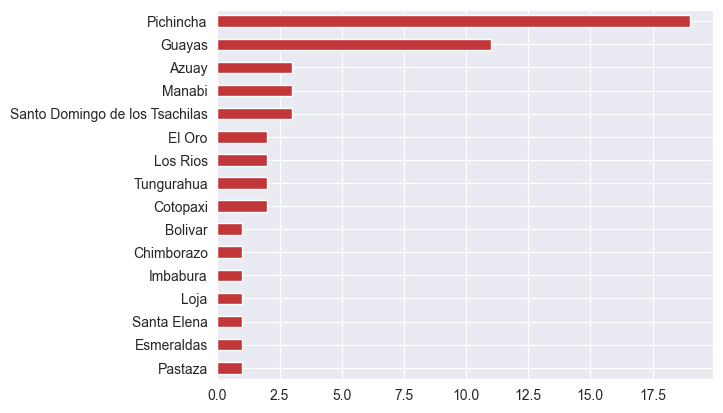

In [246]:
stores["state"].value_counts().sort_values().plot(kind='barh')

### maybe you can add anotate to the bar

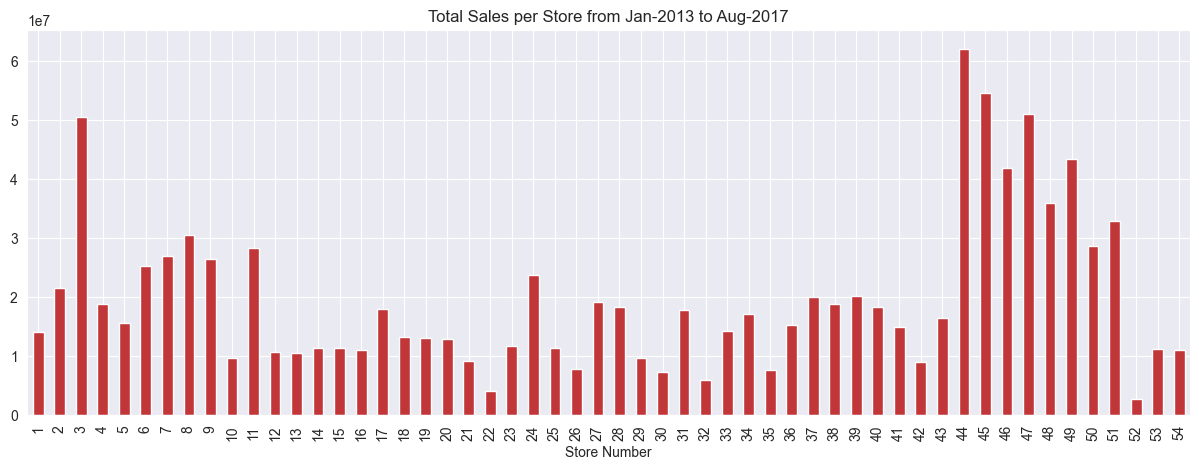

In [247]:
train.groupby("store_nbr")["sales"].sum().plot(kind="bar", figsize=(15, 5))

plt.title("Total Sales per Store from Jan-2013 to Aug-2017")
plt.xlabel("Store Number")
plt.show()


In [248]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [249]:
train_sales = train.groupby("store_nbr")["sales"].sum()

In [250]:
stores_merge = stores.merge(train_sales, left_on="store_nbr", right_index=True)

In [251]:
stores_merge[stores_merge["sales"] > 3*10**7]

,store_nbr,city,state,type,cluster,sales
2,3,Quito,Pichincha,D,8,5.048191e+07
7,8,Quito,Pichincha,D,8,3.049429e+07
43,44,Quito,Pichincha,A,5,6.208755e+07
44,45,Quito,Pichincha,A,11,5.449801e+07
45,46,Quito,Pichincha,A,14,4.189606e+07
46,47,Quito,Pichincha,A,14,5.094831e+07
47,48,Quito,Pichincha,A,14,3.593313e+07
48,49,Quito,Pichincha,A,11,4.342010e+07
50,51,Guayaquil,Guayas,A,17,3.291149e+07


just for note if we dont have transactions data for testind date range. this is can make as confident to dont use the transactions data

<AxesSubplot: xlabel='store_nbr'>

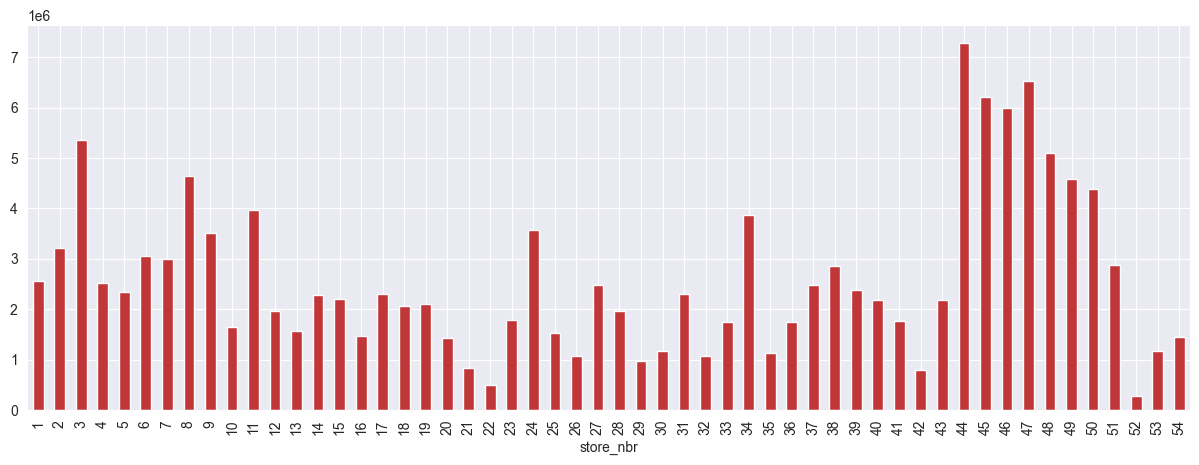

In [252]:
transactions.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

In [253]:
stores["city"].value_counts().sort_index()

Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: city, dtype: int64

#### Do analysis by Famiiy

<AxesSubplot: ylabel='family'>

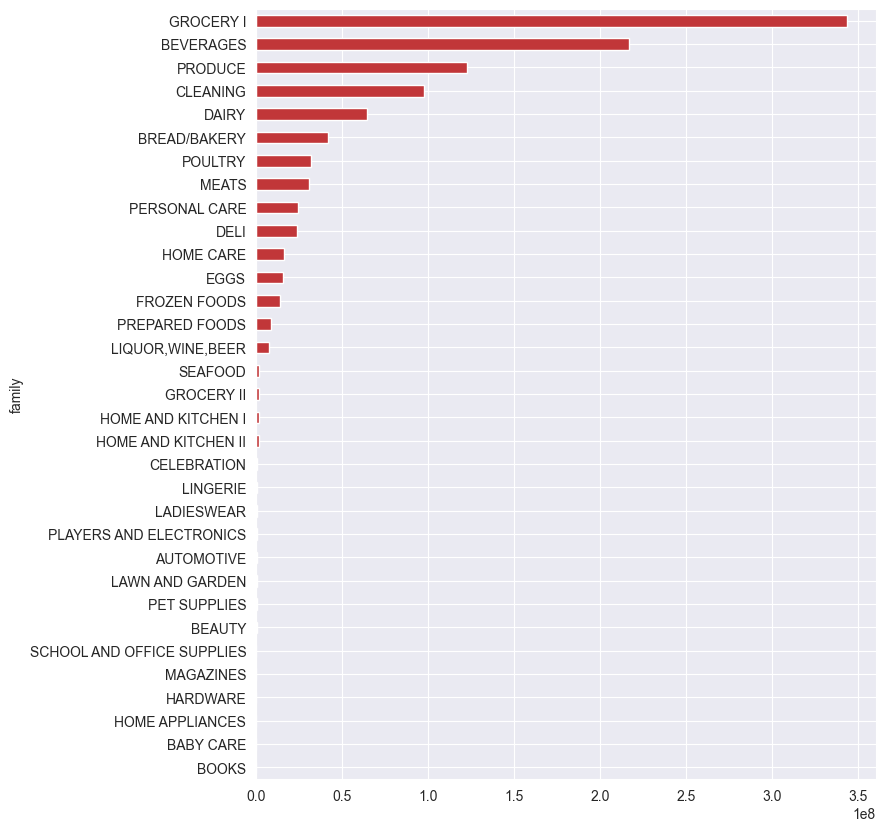

In [254]:
train.groupby("family")["sales"].sum().sort_values().plot(kind="barh", figsize=(8, 10))

#### Do analysis by Time Series

##### Year Sales

In [255]:
train["year"] = train.index.year
train["month"] = train.index.month
train["weekday"] = train.index.weekday
train["day"] = train.index.day
train["quarter"] = train.index.quarter

In [256]:
train["weekday"] = train["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

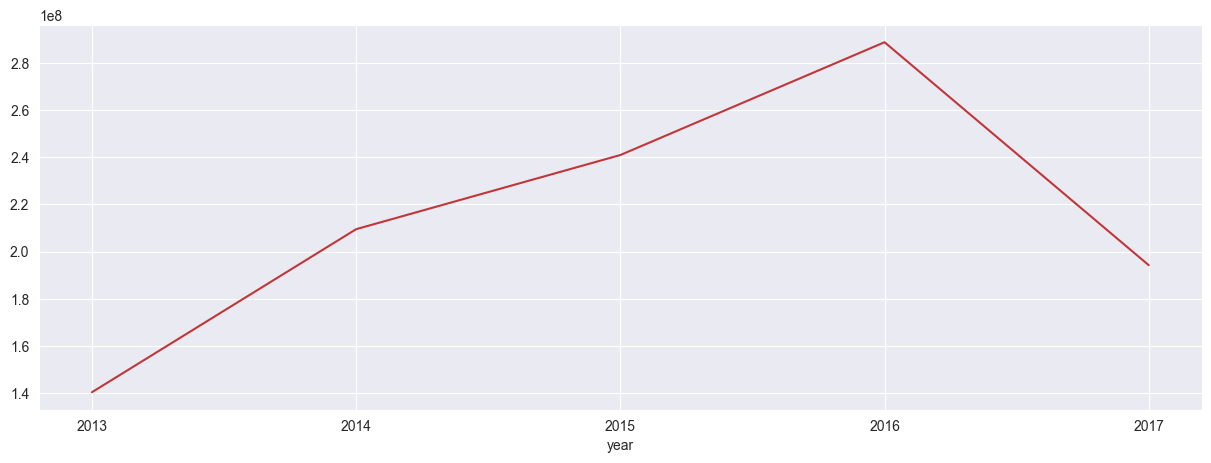

In [257]:
train.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2018, 1))

plt.show()

if we see in 2017 number of sales is decrease because one of the reason is we only have data until august 2017. Then to get good analysis by agregation and visualization comparison we have to drop 2017 data first

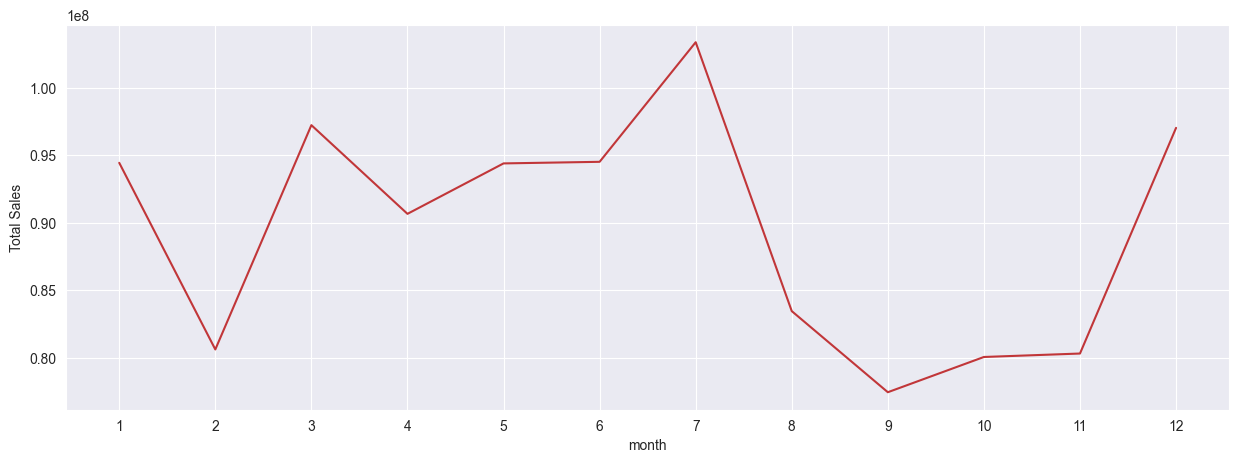

In [258]:
train.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")
plt.show()

##### Drop 2017 Data

In [259]:
train_viz = train.loc[train["year"] != 2017]

##### Revisualize the data

In [260]:
train_viz.head()

,id,store_nbr,family,sales,onpromotion,year,month,weekday,day,quarter
date,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,Tuesday,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,Tuesday,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,Tuesday,1,1


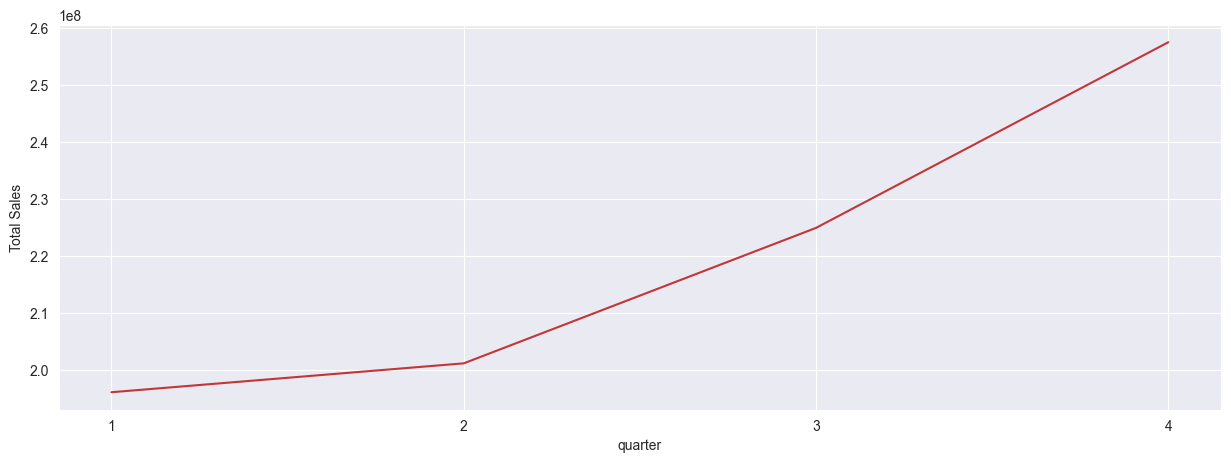

In [261]:
train_viz.groupby("quarter")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 5))                                       
plt.ylabel("Total Sales")

plt.show()

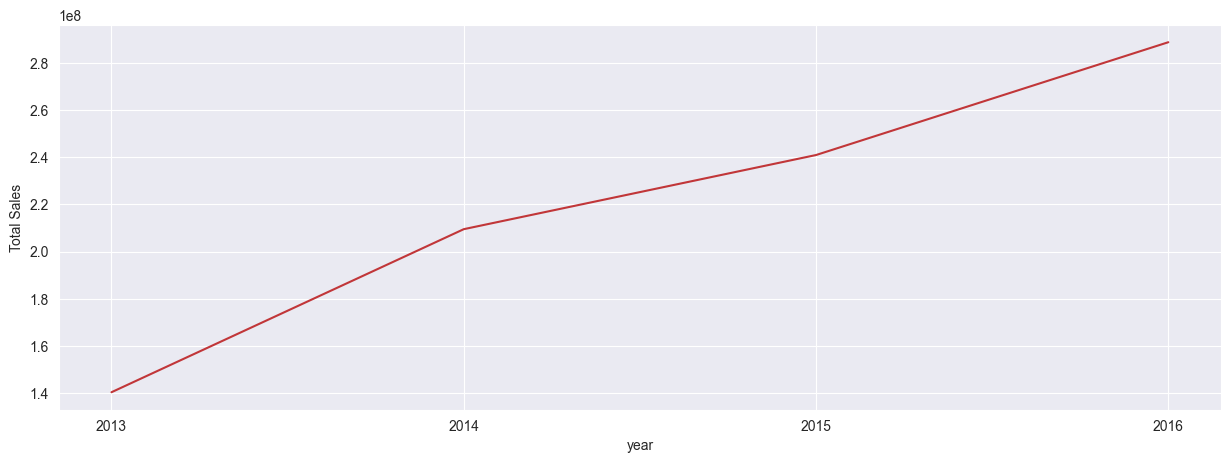

In [262]:
train_viz.groupby("year")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2017, 1))
plt.ylabel("Total Sales")
plt.show()

In [263]:
train_viz.head()

,id,store_nbr,family,sales,onpromotion,year,month,weekday,day,quarter
date,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013,1,Tuesday,1,1
2013-01-01,2,1,BEAUTY,0.0,0,2013,1,Tuesday,1,1
2013-01-01,3,1,BEVERAGES,0.0,0,2013,1,Tuesday,1,1
2013-01-01,4,1,BOOKS,0.0,0,2013,1,Tuesday,1,1


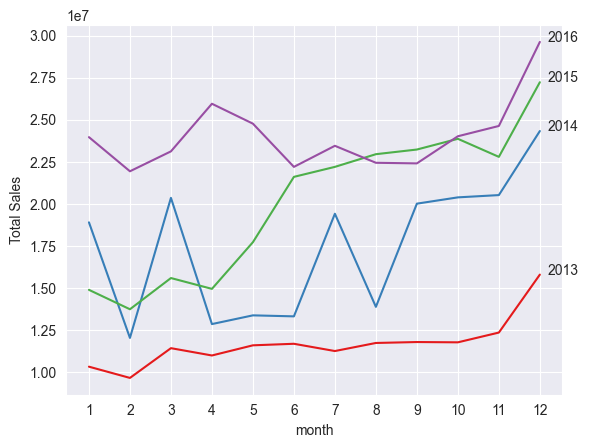

In [264]:
year = train_viz.groupby(["year","month"])["sales"].sum().reset_index()

sns.lineplot(x="month", y="sales", hue="year", data=year, palette="Set1", legend = False)


for year_value in year["year"].unique():
    subset = year[year["year"] == year_value]
    last_point = subset.tail(1)
    plt.annotate(year_value, xy=(last_point["month"].values[0], last_point["sales"].values[0]),
                 xytext=(last_point["month"].values[0] + 0.2, last_point["sales"].values[0]))


plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")


plt.show()

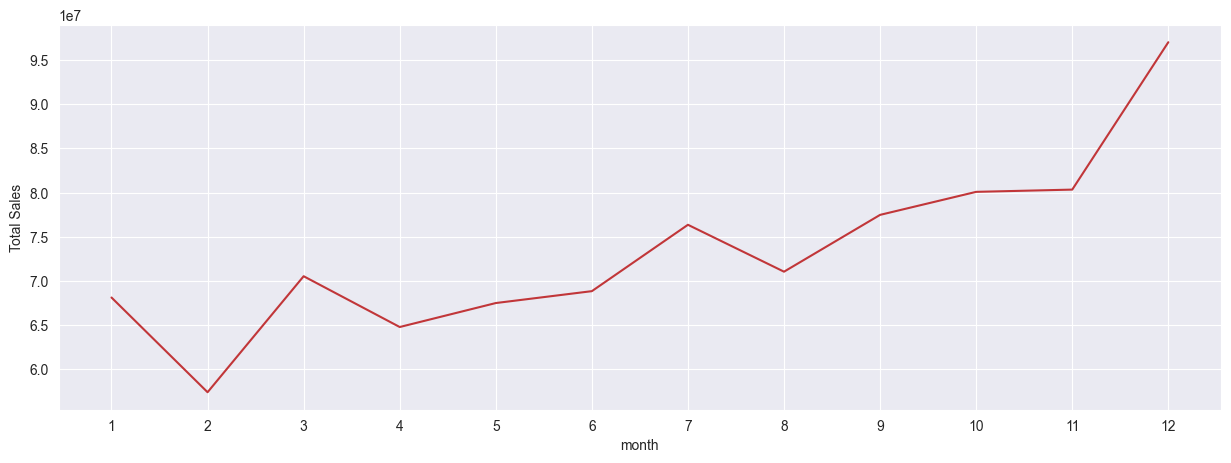

In [265]:
train_viz.groupby("month")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))
plt.ylabel("Total Sales")

plt.show()

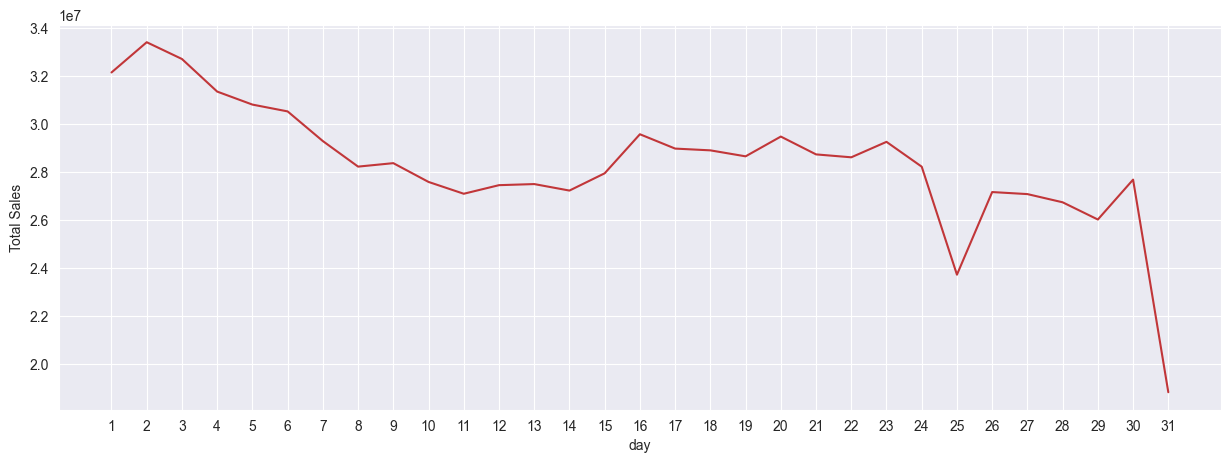

In [266]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")
plt.show()

In [267]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

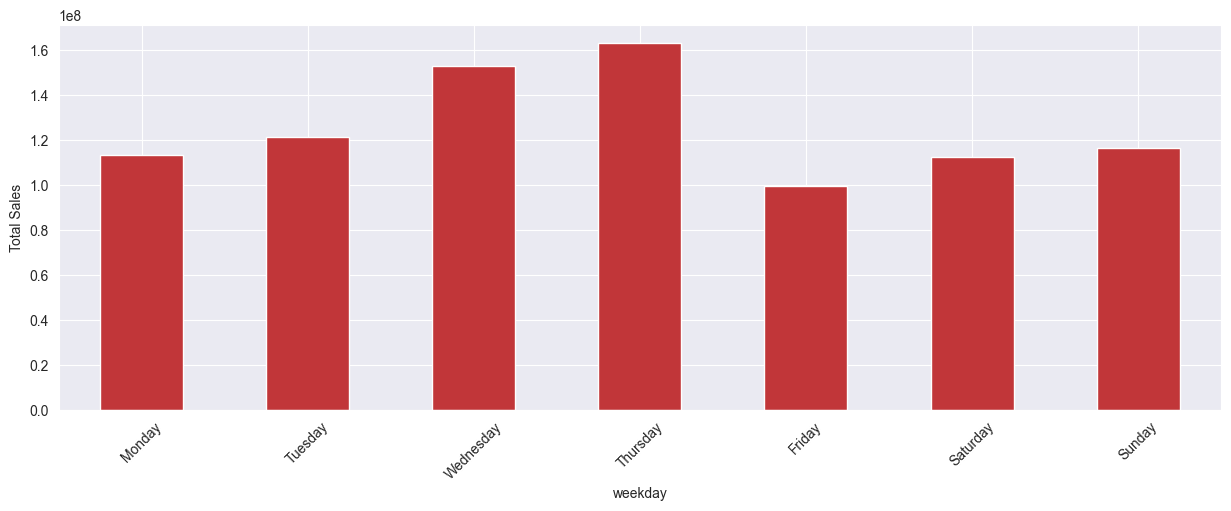

In [268]:
train_viz.groupby("weekday")["sales"].sum().plot(kind="bar", figsize=(15, 5))
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.ylabel("Total Sales")

plt.show()

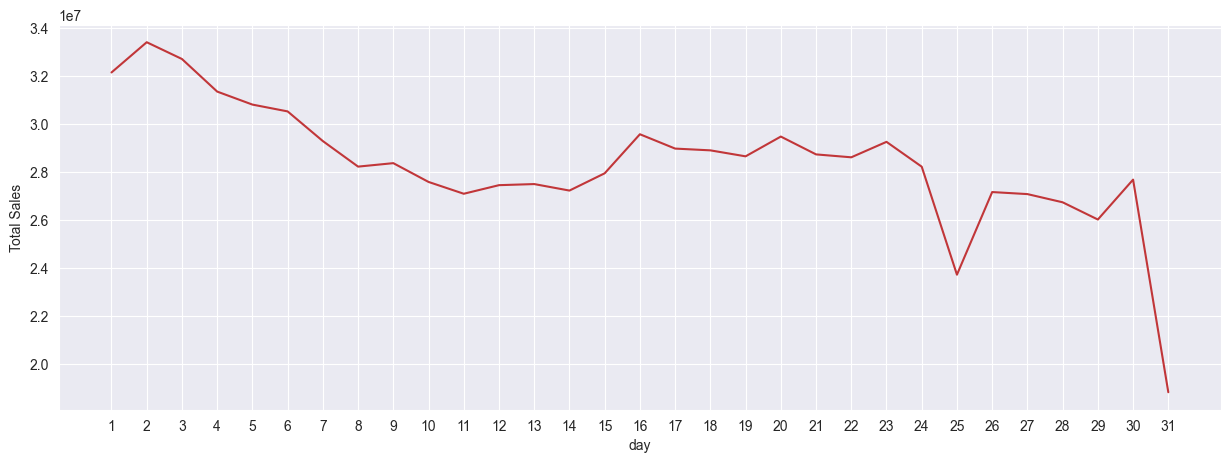

In [269]:
train_viz.groupby("day")["sales"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(1, 32))
plt.ylabel("Total Sales")

plt.show()  

#### Do analysis by Holiday

In [270]:
holidays_events.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [271]:
holidays_events["type"].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [272]:
holidays_events["locale"].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [273]:
holidays_events["date"].min(), holidays_events["date"].max()

('2012-03-02', '2017-12-26')

we need to drop some data like 2017 and 2012 data

In [274]:
# we drop the transferred holidays

holidays = holidays_events[holidays_events["transferred"] == False]
holidays = holidays[(holidays["date"] < "2017-01-01") & (holidays["date"] >= "2013-01-01")]


In [275]:
holidays.head()

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False


In [276]:
holidays["date"] = pd.to_datetime(holidays["date"])

holidays.set_index("date", inplace=True)

In [277]:
holidays.loc[holidays.index.duplicated(keep=False)].tail()

,type,locale,locale_name,description,transferred
date,,,,,
2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
2016-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False
2016-12-22,Additional,National,Ecuador,Navidad-3,False
2016-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


if you check there are some date that have 2 holidays in a day like national and local. So we need to drop the local one because already included in national

In [278]:
holidays["year"] = holidays.index.year
holidays["month"] = holidays.index.month
holidays["weekday"] = holidays.index.weekday
holidays["day"] = holidays.index.day



In [279]:
holidays.drop_duplicates(subset=["locale", "locale_name", "year", "month", "day"], inplace=True)


In [280]:
filtered_index = holidays[(holidays.index.duplicated(keep=False)) & (holidays["locale"] == "National")].index

holidays_filtered = holidays.drop(holidays[(holidays.index.isin(filtered_index)) & ((holidays["locale"] == "Local") | (holidays["locale"] == "Regional"))].index)


In [281]:
holidays_filtered["weekday"] = holidays_filtered["weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

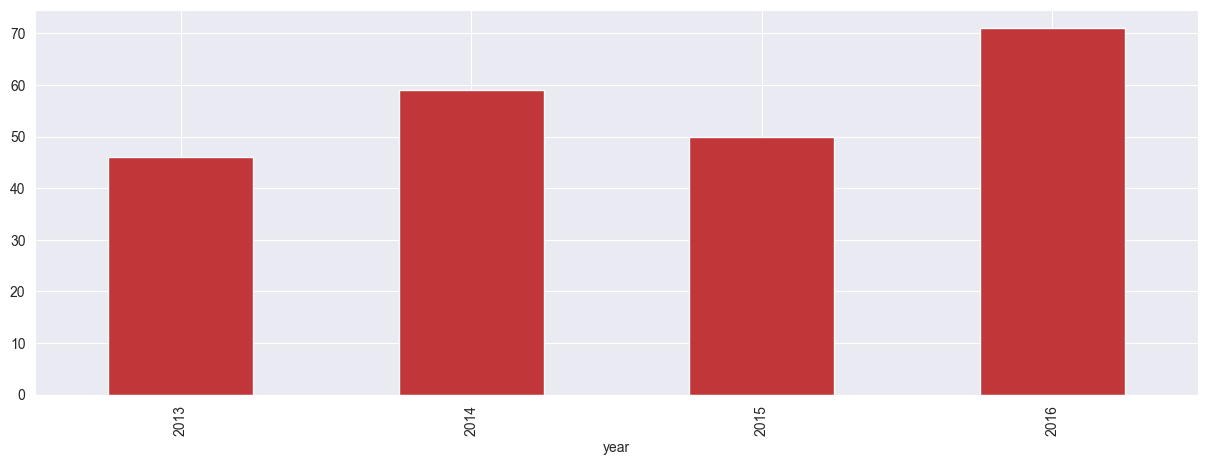

In [282]:
holidays_filtered.groupby("year")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.show()

<AxesSubplot: xlabel='month'>

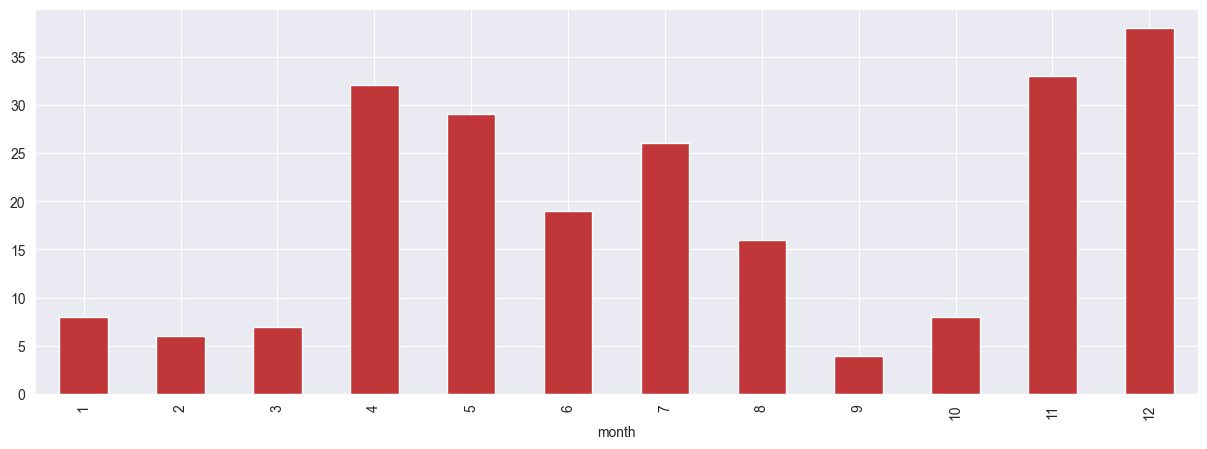

In [283]:
holidays_filtered.groupby("month")["type"].count().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

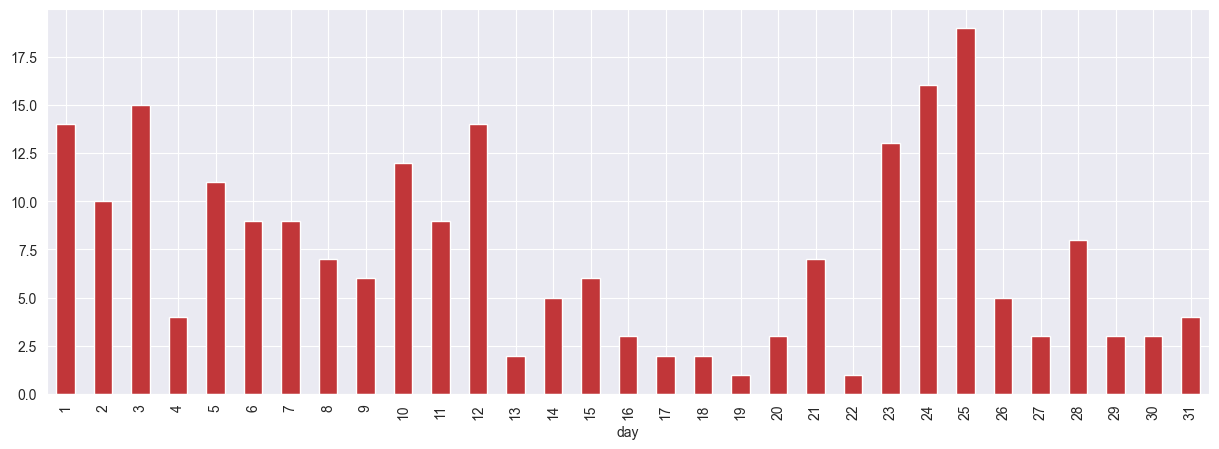

In [284]:
holidays_filtered.groupby("day")["type"].count().plot(kind="bar", figsize=(15, 5))

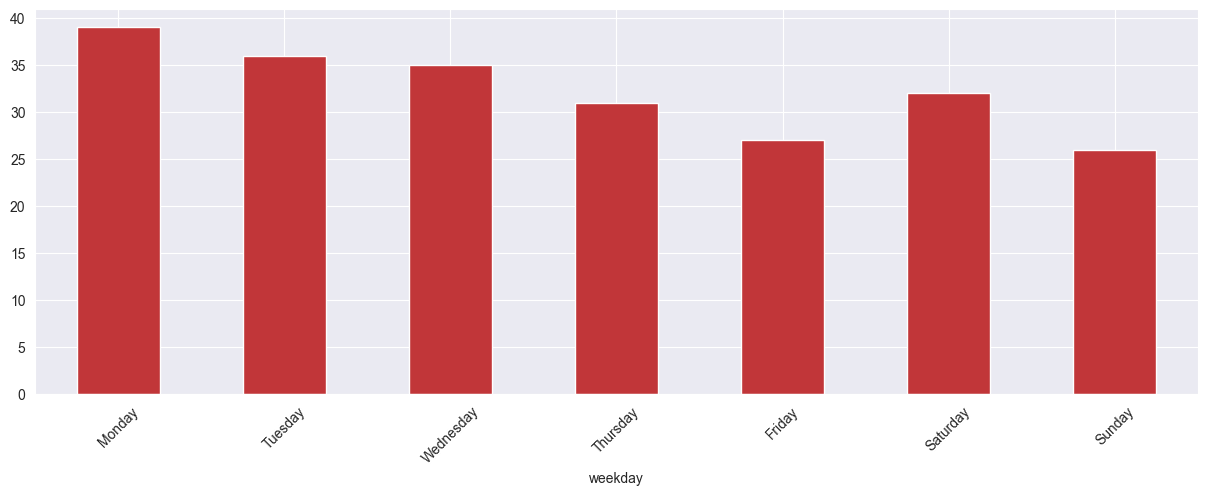

In [285]:
holidays_filtered.groupby("weekday")["type"].count().plot(kind="bar", figsize=(15, 5))

plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)

plt.show()

### Do analysis on the oil price

In [286]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [287]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [288]:
missing_days = pd.date_range(start='2013-01-01', end='2017-08-15').difference(oil["date"])

In [289]:
import missingno as msno

<AxesSubplot: >

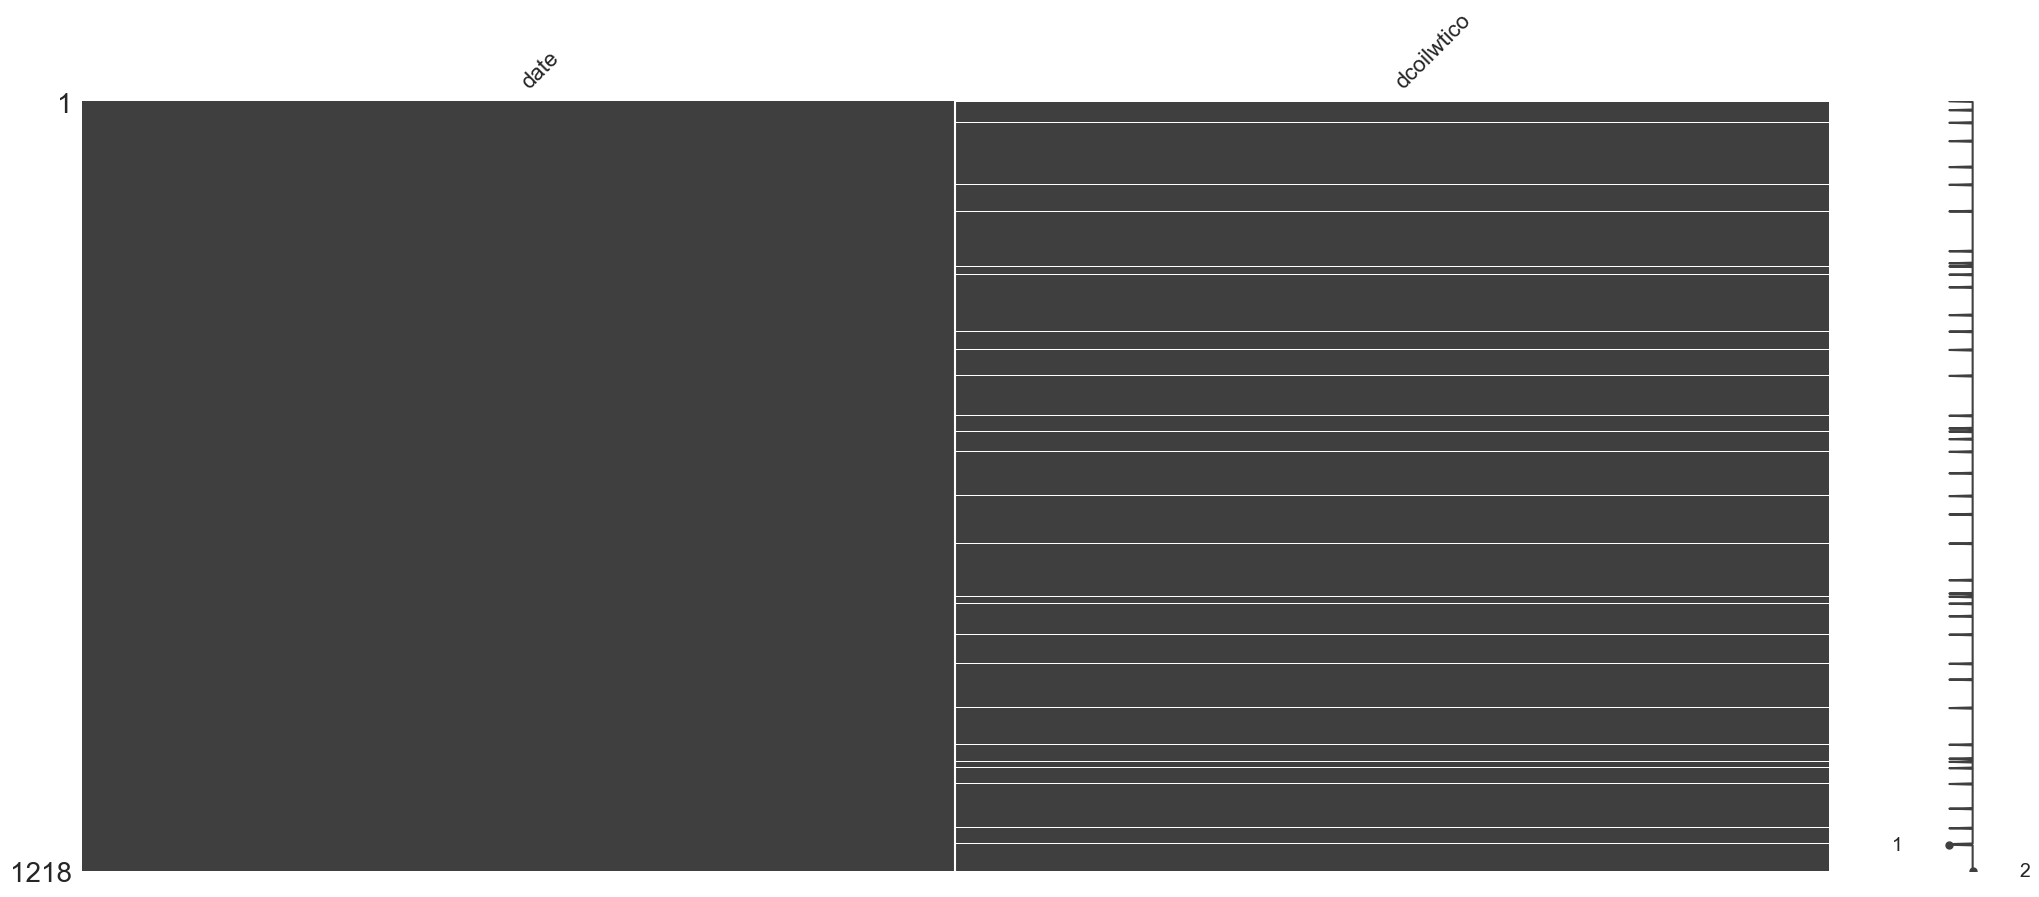

In [290]:
msno.matrix(oil)

In [291]:
index_date(oil)

<AxesSubplot: xlabel='date'>

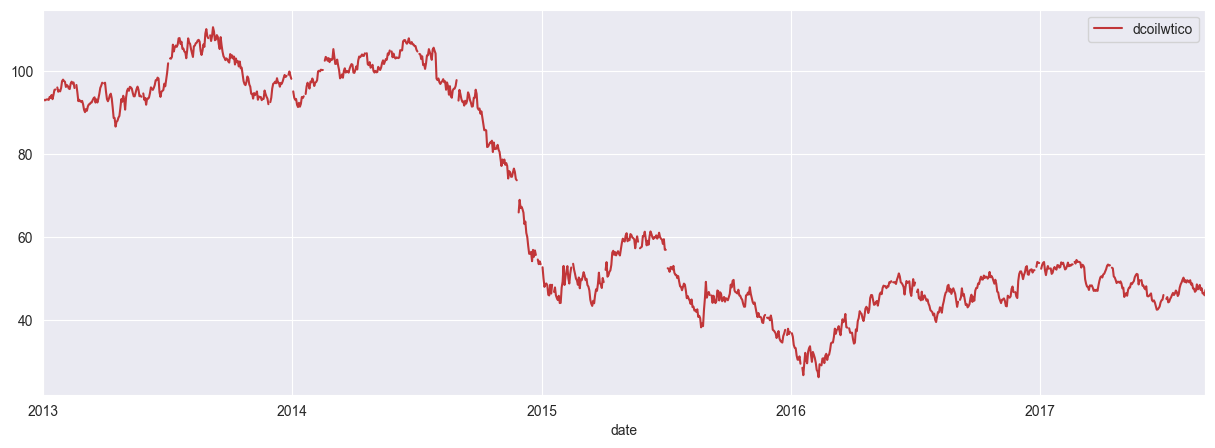

In [292]:
oil.plot(figsize=(15, 5))

there are some null values in the oil dataset and also missing days
we will use interpolate to fill na value and also for missing days we will treat when we merge with train data so there will be some missing values for oil price

In [293]:
oil.fillna(method="ffill", inplace=True)

In [294]:
oil["dcoilwtico"] = oil["dcoilwtico"].interpolate(method="linear")

In [295]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [297]:
oil.loc["2013-01-01", "dcoilwtico"] = 93.14

In [300]:
oil["year"] = oil.index.year
oil["month"] = oil.index.month
oil["day"] = oil.index.day
oil["weekday"] = oil.index.weekday

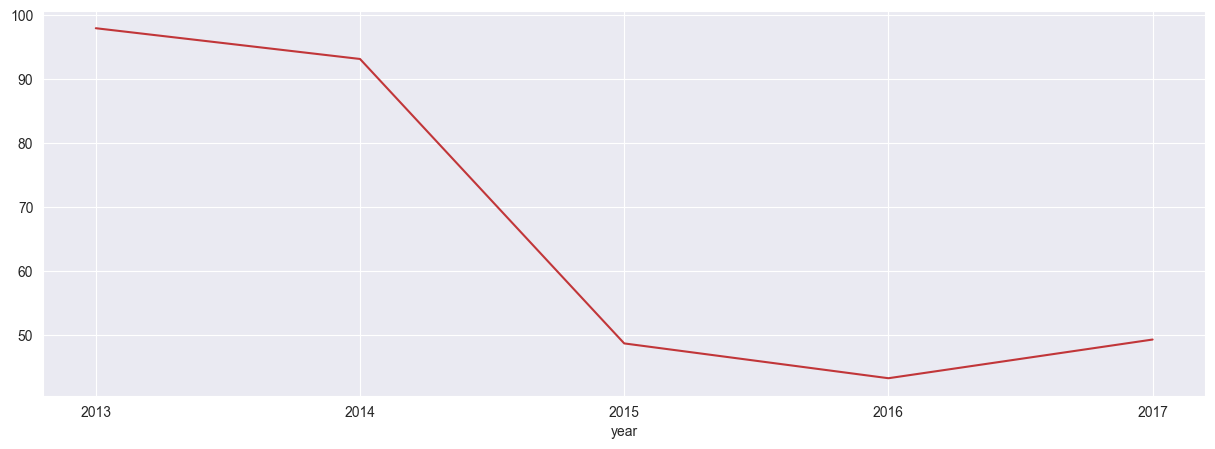

In [301]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2018, 1))

plt.show()

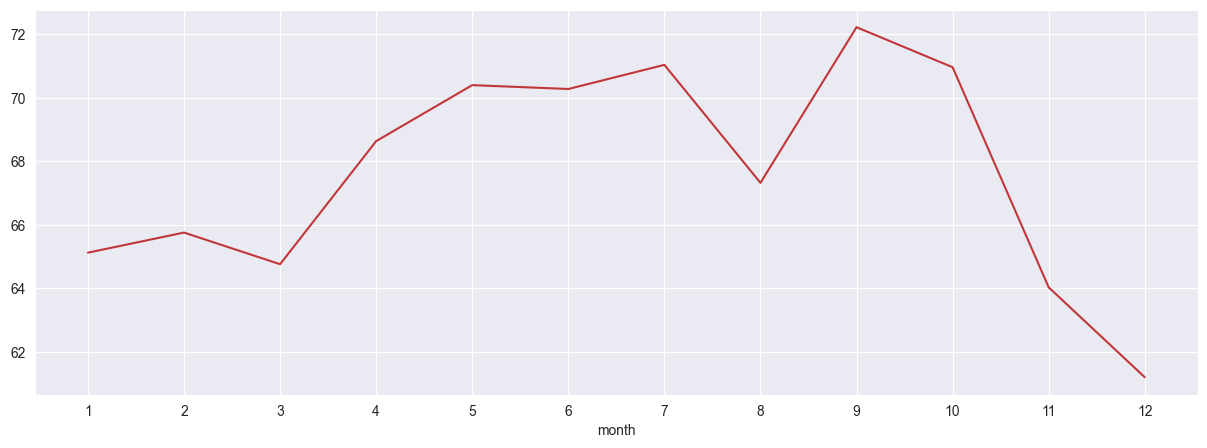

In [302]:
oil.groupby("month")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

### Do analysis on the transactions

In [303]:
transactions["year"] = transactions.index.year
transactions["month"] = transactions.index.month
transactions["day"] = transactions.index.day
transactions["weekday"] = transactions.index.weekday

In [304]:
transactions_viz = transactions.loc[transactions["year"] != 2017]

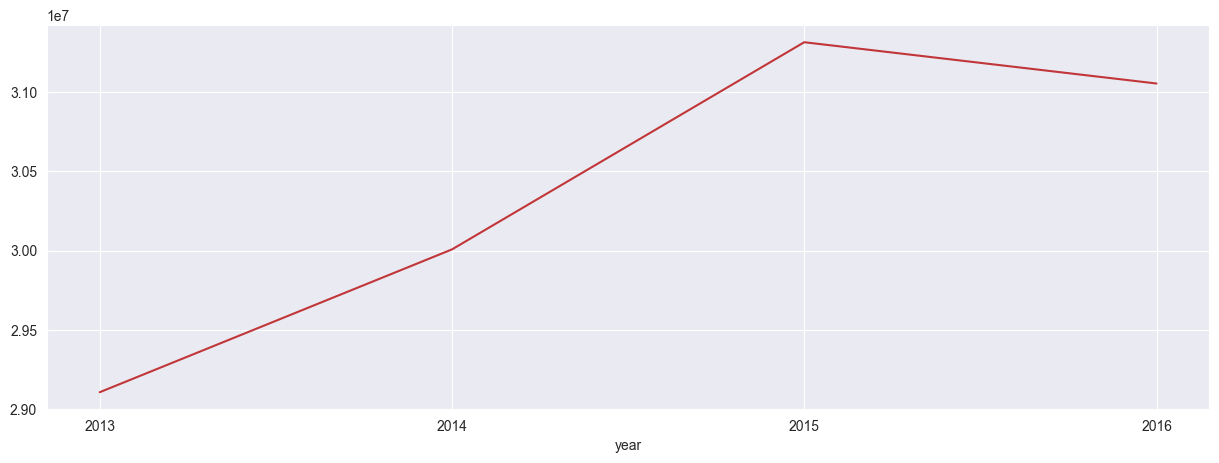

In [305]:
transactions_viz.groupby("year")["transactions"].sum().plot(kind="line", figsize=(15, 5))
plt.xticks(np.arange(2013, 2017, 1))
plt.show()

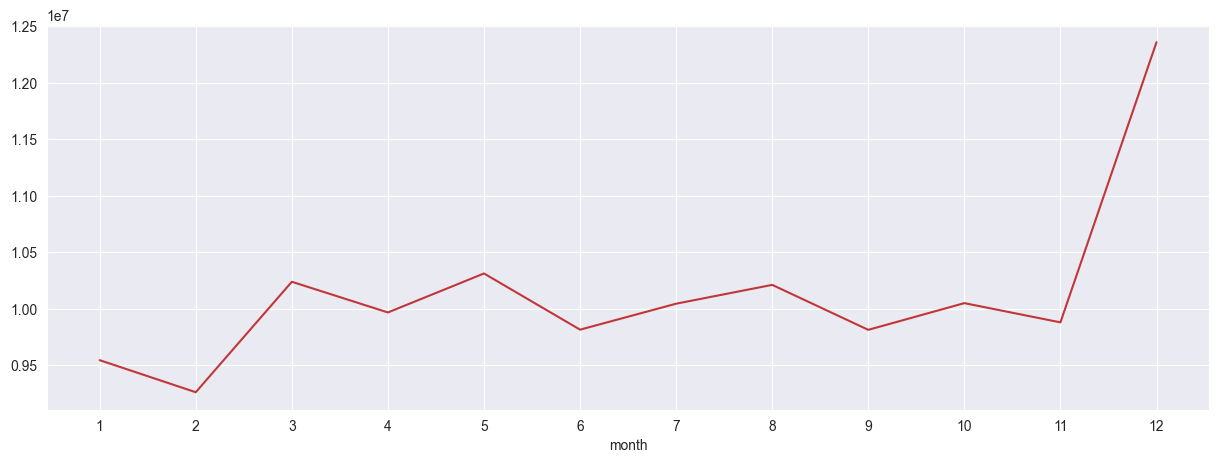

In [306]:
transactions_viz.groupby("month")["transactions"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

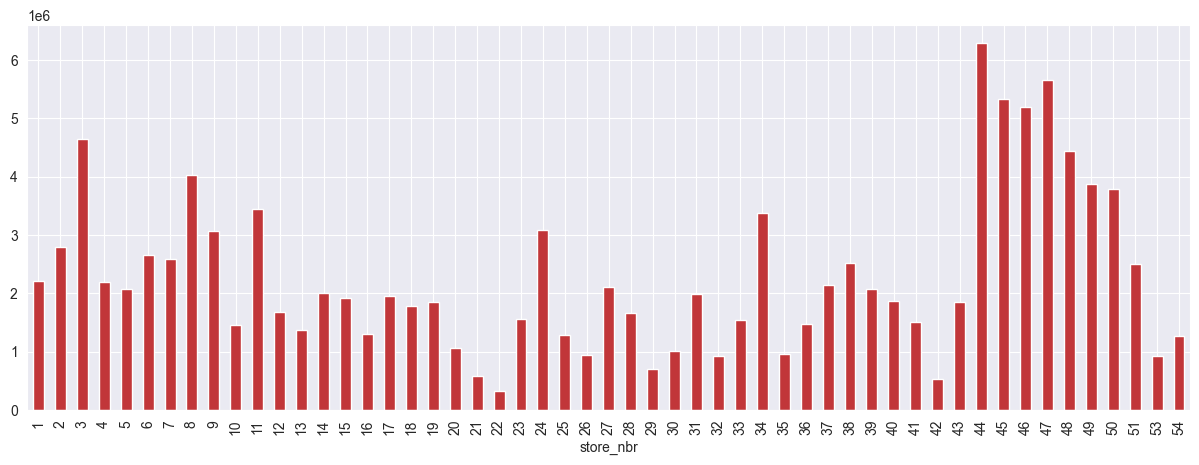

In [307]:
transactions_viz.groupby("store_nbr")["transactions"].sum().plot(kind="bar", figsize=(15, 5))

plt.show()

### Combine Dataset and Feature Engineering

we will have two important dataset. First is transactions and stores

In [308]:
transactions_viz.head()

,store_nbr,transactions,year,month,day,weekday
date,,,,,,
2013-01-01,25,770,2013,1,1,1
2013-01-02,1,2111,2013,1,2,2
2013-01-02,2,2358,2013,1,2,2
2013-01-02,3,3487,2013,1,2,2
2013-01-02,4,1922,2013,1,2,2


In [309]:
transactions_store= transactions_viz.merge(stores, on="store_nbr", how="left")

In [310]:
transactions_store.set_index(transactions_viz.index, inplace=True)

In [311]:
sales_store = train_viz.groupby(["date","store_nbr" ])["sales", "onpromotion"].sum().reset_index()

In [312]:
sales_store.head()

,date,store_nbr,sales,onpromotion
0,2013-01-01,1,0.0,0
1,2013-01-01,2,0.0,0
2,2013-01-01,3,0.0,0
3,2013-01-01,4,0.0,0
4,2013-01-01,5,0.0,0


In [313]:
transaction_full= transactions_store.merge(sales_store, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left")

In [314]:
transaction_full.set_index("date", inplace=True)

In [315]:
#aov(average order values)
#aov  = sales/transactions

In [316]:
transaction_full["aov"] = transaction_full["sales"] / transaction_full["transactions"]

<AxesSubplot: xlabel='store_nbr'>

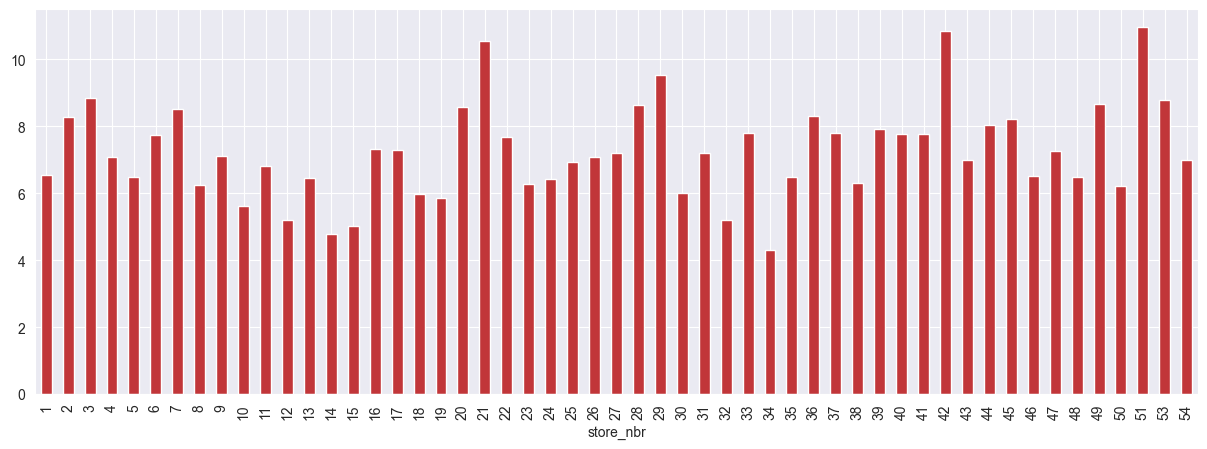

In [317]:
transaction_full.groupby("store_nbr")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

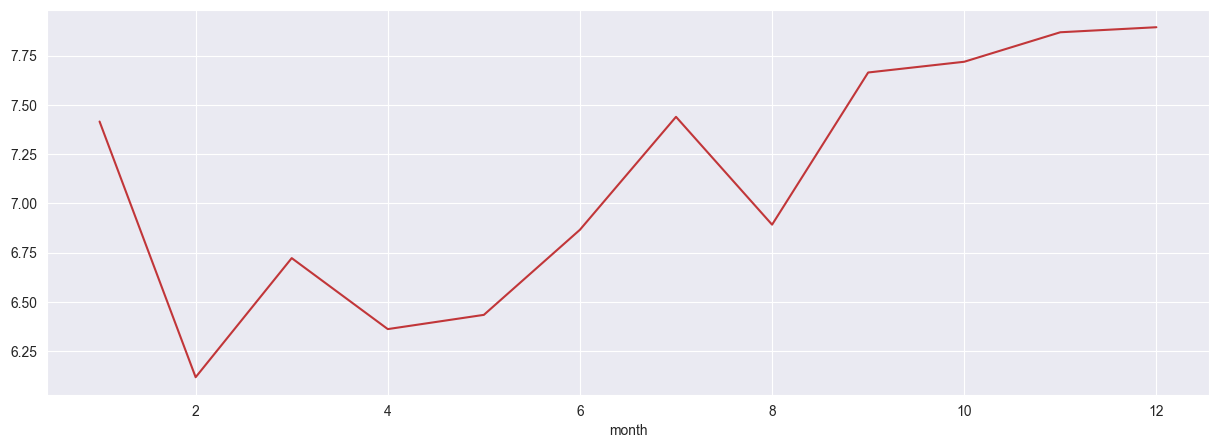

In [318]:
transaction_full.groupby("month")["aov"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

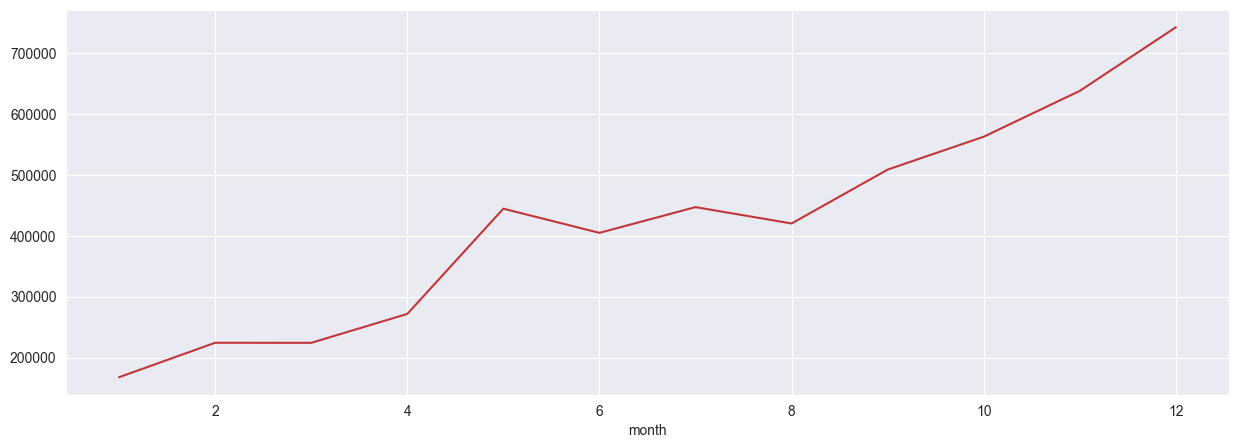

In [319]:
transaction_full.groupby("month")["onpromotion"].sum().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='day'>

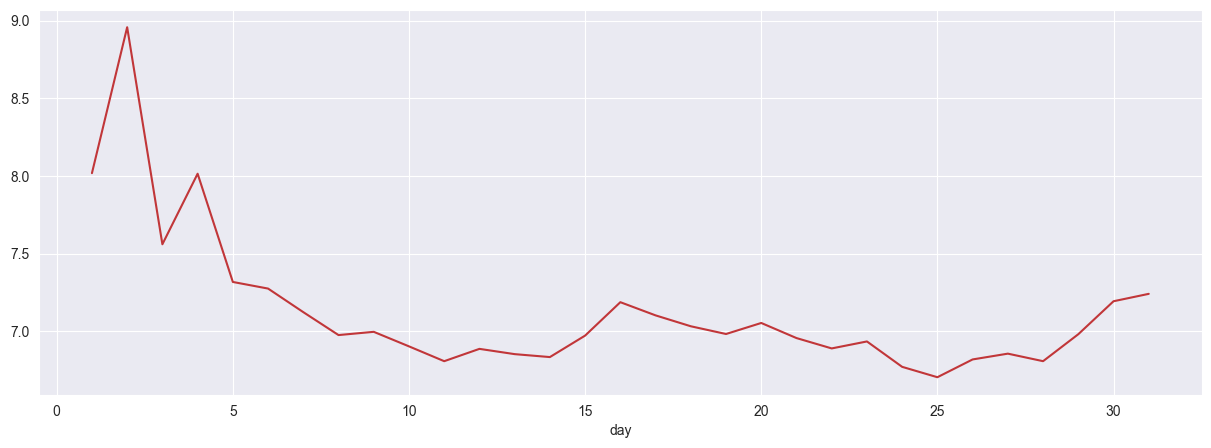

In [320]:
transaction_full.groupby("day")["aov"].mean().plot(kind="line", figsize=(15, 5))

<AxesSubplot: xlabel='year'>

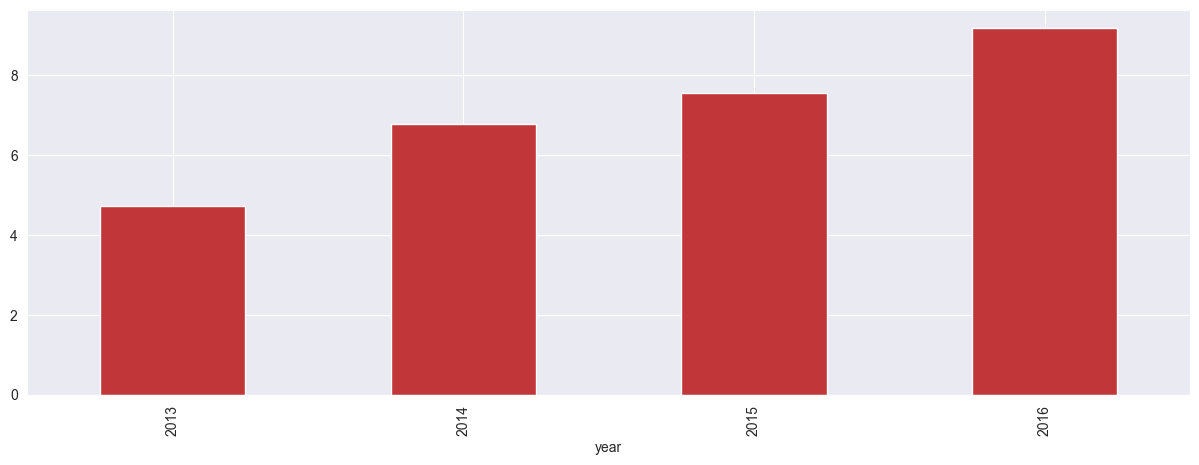

In [321]:
transaction_full.groupby("year")["aov"].mean().plot(kind="bar", figsize=(15, 5))

In [322]:
# promotional_sales_ratio (psr)= promotional_sales(onpromotion) / total_sales

transaction_full["psr"] = transaction_full["onpromotion"] / transaction_full["sales"]

<AxesSubplot: xlabel='store_nbr'>

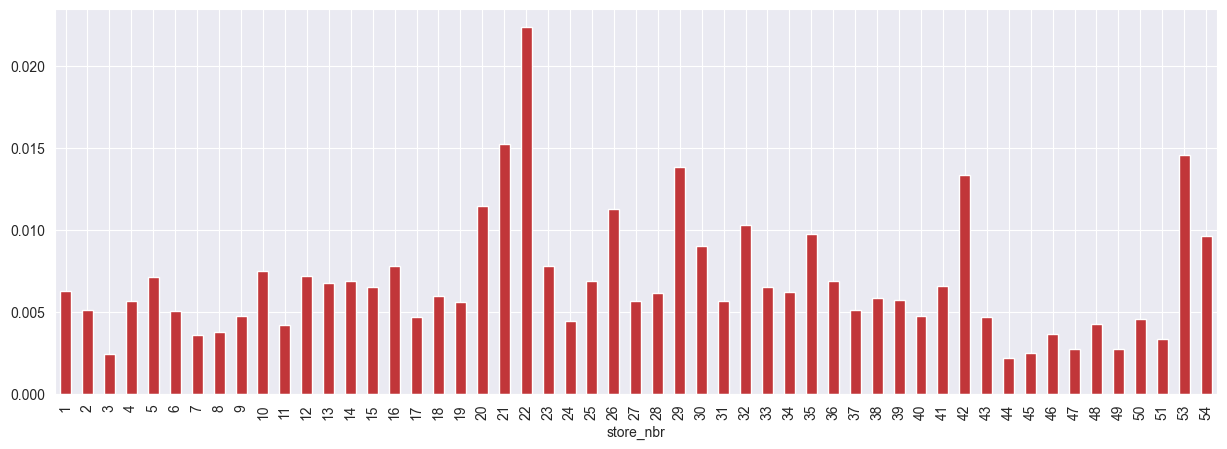

In [323]:
transaction_full.groupby("store_nbr")["psr"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='month'>

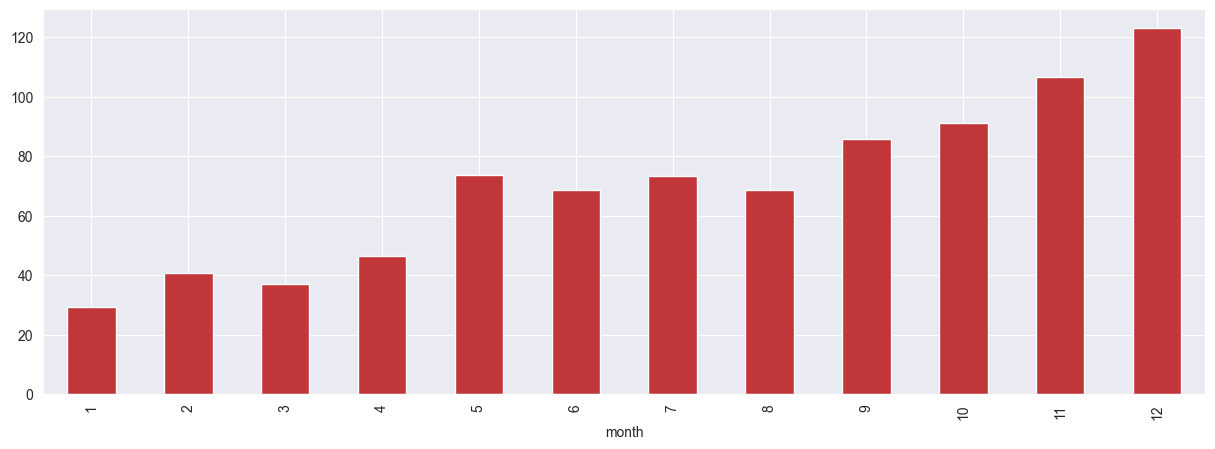

In [324]:
transaction_full.groupby("month")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='store_nbr'>

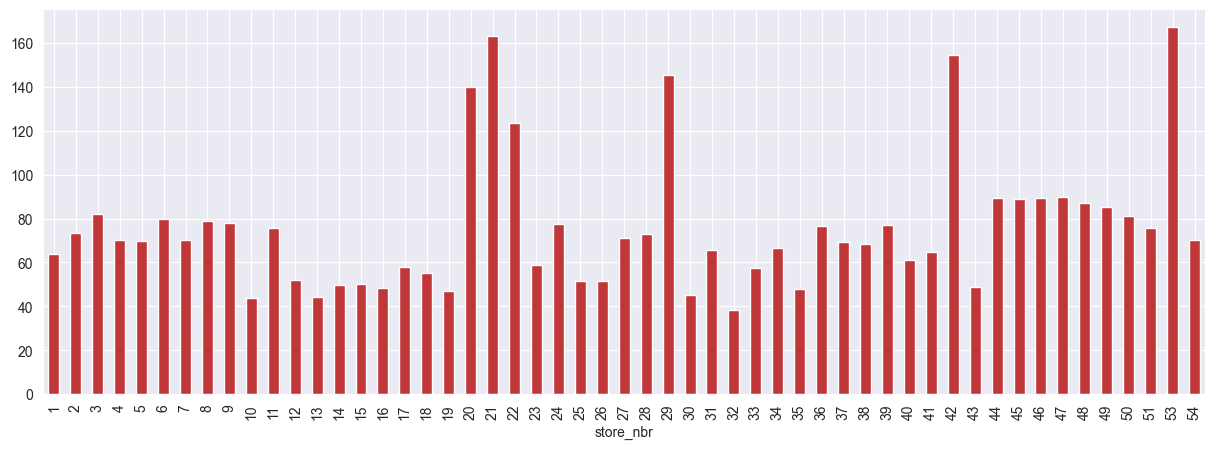

In [325]:
transaction_full.groupby("store_nbr")["onpromotion"].mean().plot(kind="bar", figsize=(15, 5))

##### add holidays data

In [326]:
local_holidays = holidays_filtered[holidays_filtered["locale"] == "Local"]
regional_holidays = holidays_filtered[holidays_filtered["locale"] == "Regional"]
national_holidays = holidays_filtered[holidays_filtered["locale"] == "National"]

In [327]:
def is_holiday_local(row):
    dummy = local_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'city']].isin(dummy).all():
        return 1
    else:
        return 0

In [328]:
def is_holiday_regional(row):
    dummy = regional_holidays[['year', 'month', 'day', 'locale_name']]
    if row[['year', 'month', 'day', 'state']].isin(dummy).all():
        return 1
    else:
        return 0

In [329]:
transaction_full["local_holiday"] = transaction_full.apply(is_holiday_local, axis=1)
transaction_full["regional_holiday"] = transaction_full.apply(is_holiday_regional, axis=1)

In [330]:
transaction_full["national_holiday"] = transaction_full.index.isin(national_holidays.index)

In [331]:
transaction_full["total_holiday"] = transaction_full["local_holiday"] + transaction_full["regional_holiday"] + transaction_full["national_holiday"]

In [332]:
transaction_full["total_holiday"].value_counts()

0    65686
1     5705
Name: total_holiday, dtype: int64

this mean after we processsed holidays data before. we dont get duplicated holidays

In [333]:
transaction_full.head()

,store_nbr,transactions,year,month,day,weekday,city,state,type,cluster,sales,onpromotion,aov,psr,local_holiday,regional_holiday,national_holiday,total_holiday
date,,,,,,,,,,,,,,,,,,
2013-01-01,25,770,2013,1,1,1,Salinas,Santa Elena,D,1,2511.618999,0,3.261843,0.0,0,0,True,1
2013-01-02,1,2111,2013,1,2,2,Quito,Pichincha,D,13,7417.148000,0,3.513571,0.0,0,0,False,0
2013-01-02,2,2358,2013,1,2,2,Quito,Pichincha,D,13,10266.718981,0,4.353994,0.0,0,0,False,0
2013-01-02,3,3487,2013,1,2,2,Quito,Pichincha,D,8,24060.348000,0,6.900014,0.0,0,0,False,0
2013-01-02,4,1922,2013,1,2,2,Quito,Pichincha,D,9,10200.083980,0,5.307016,0.0,0,0,False,0


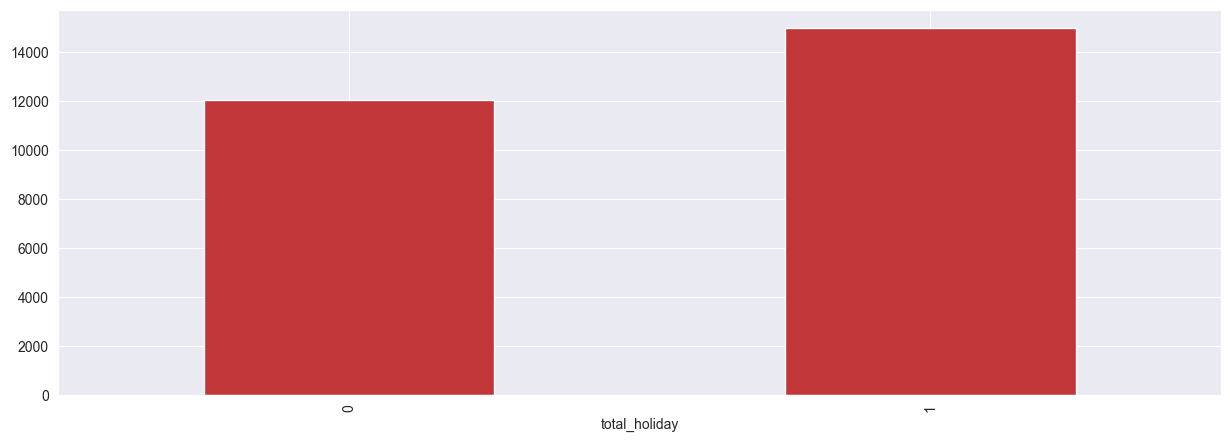

In [334]:
transaction_full.groupby("total_holiday")["sales"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

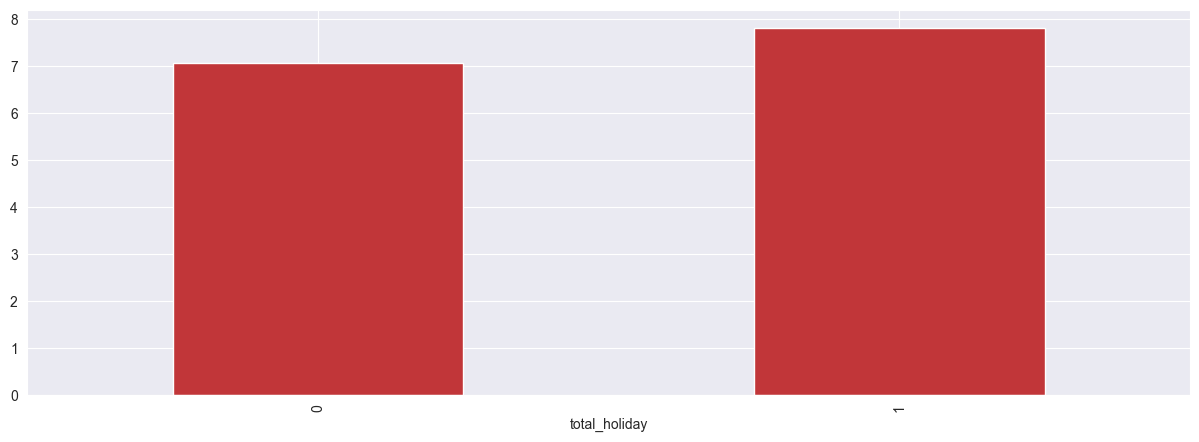

In [335]:
transaction_full.groupby("total_holiday")["aov"].mean().plot(kind="bar", figsize=(15, 5))

plt.show()

In [336]:
test = transaction_full.groupby(["year", "month"])["aov"].mean().reset_index()

<AxesSubplot: xlabel='month', ylabel='aov'>

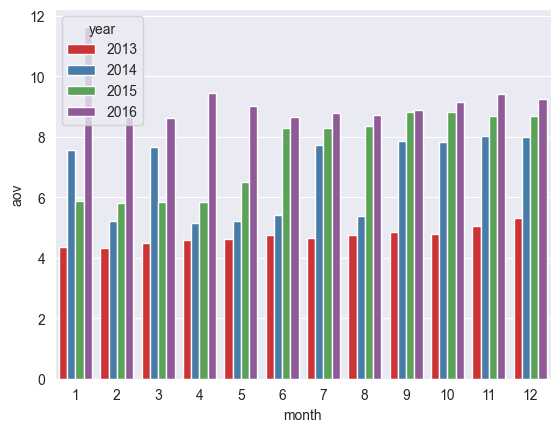

In [337]:
sns.barplot(x="month", y="aov", hue="year", data=test, palette="Set1", legend=True)

### Add oil price

In [338]:
oil.head()

,dcoilwtico,year,month,day,weekday
date,,,,,
2013-01-01,93.14,2013,1,1,1
2013-01-02,93.14,2013,1,2,2
2013-01-03,92.97,2013,1,3,3
2013-01-04,93.12,2013,1,4,4
2013-01-07,93.20,2013,1,7,0


In [339]:
transaction_full = transaction_full.merge(oil[["dcoilwtico"]], left_index=True, right_index=True, how="left")

### Summary of EDA

#### Based on explatory data we will do some important graph to get insight from the data

Note :
* Transaction is the number of transaction in each store
* Sales is the total sales in each store especially is some category family in train dataset

### Analysis by Year

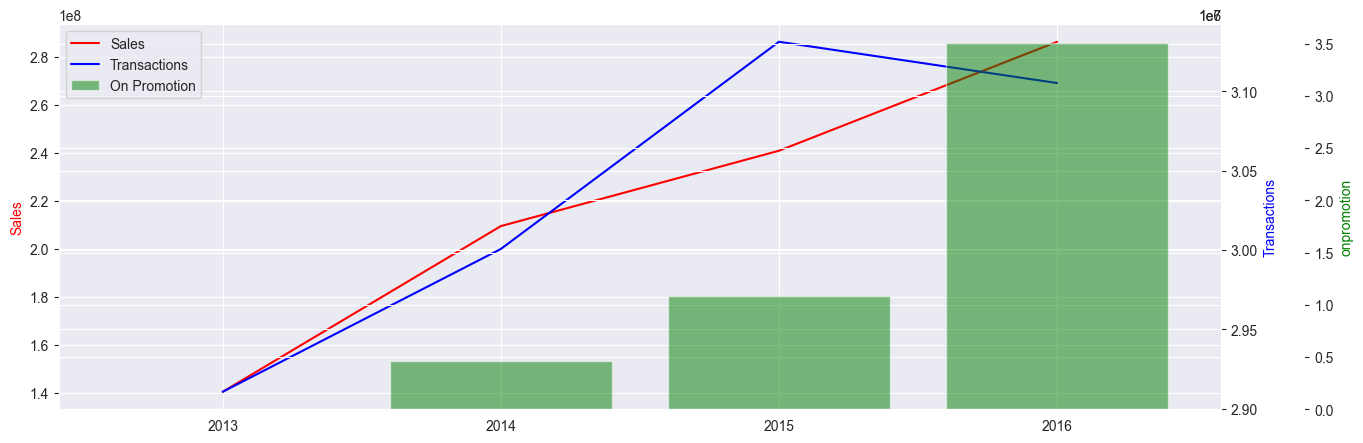

In [340]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("year")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("year")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.bar(transaction_full.groupby("year")["onpromotion"].sum().index, transaction_full.groupby("year")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(2013, 2017, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("Year")

plt.show()


key points:

1. Number of transaction and sales is increasing every year except number of transaction in 2016 is decreasing 
2. Even though number of transaction is decreasing in 2016, sales is increasing. This can be due to number of onpromotion is highly increasing in 2016 around 226% from 2015
3. This sales also can be affected by oil price, which every year oil price is decreasing that can affect the customer purchasing power

In [341]:
### Table percentage of change in on promotion each year

promotion = transaction_full.groupby("year")["onpromotion"].sum().reset_index().sort_values("year")
promotion["percentage_change"] = promotion["onpromotion"].pct_change()*100

In [342]:
promotion

,year,onpromotion,percentage_change
0,2013,0,NaN
1,2014,459114,inf
2,2015,1087275,136.820267
3,2016,3509267,222.757996


(2013.0, 2016.0)

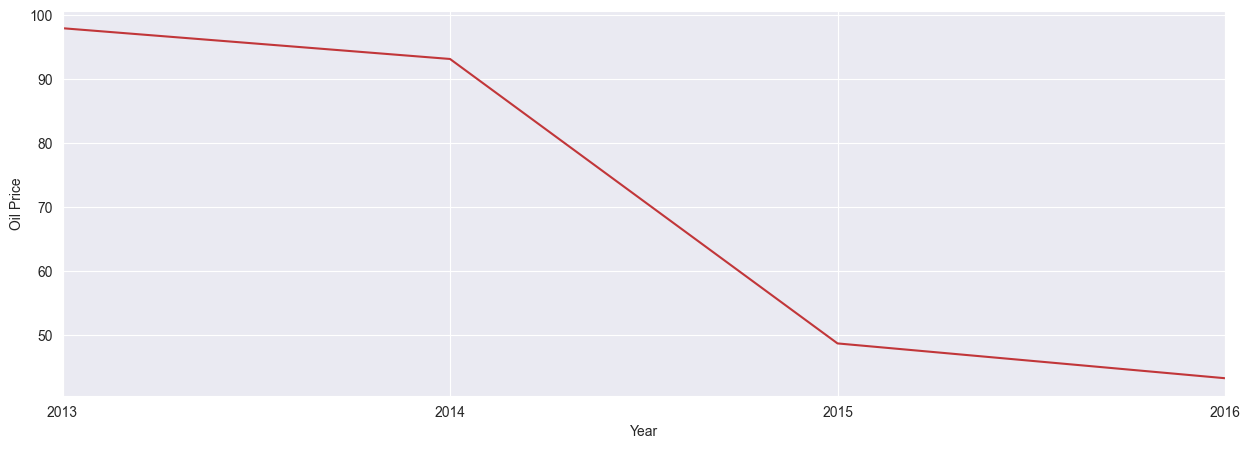

In [343]:
oil.groupby("year")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(2013, 2017, 1))

plt.xlabel("Year")
plt.ylabel("Oil Price")

plt.xlim(2013, 2016)

#### holidays

In [344]:
holidays_filtered["national_holiday"] = holidays_filtered["locale"].apply(lambda x: 1 if x == "National" else 0)

Text(0, 0.5, 'Number of National Holiday')

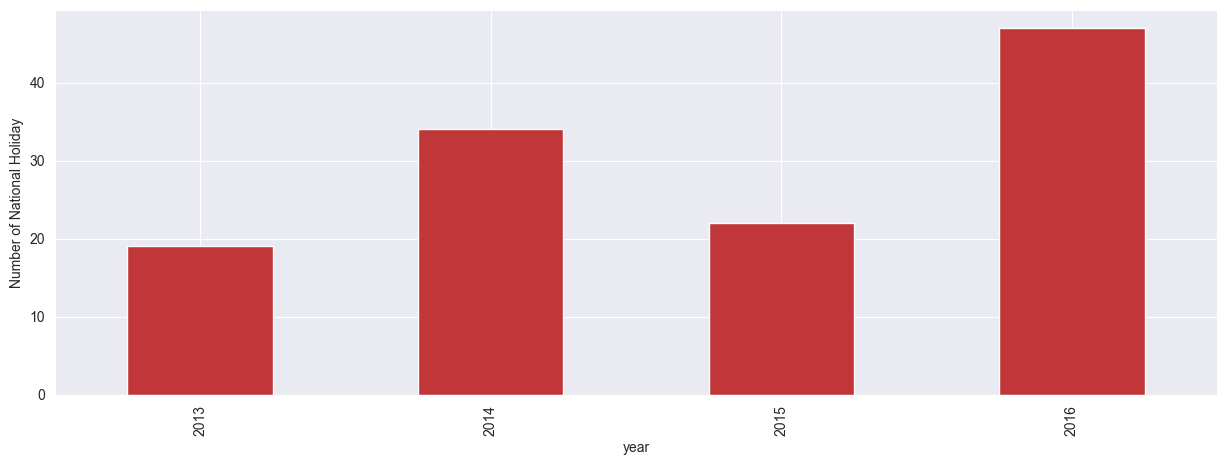

In [345]:
holidays_filtered.groupby("year")["national_holiday"].sum().plot(kind="bar", figsize=(15, 5))

plt.ylabel("Number of National Holiday")

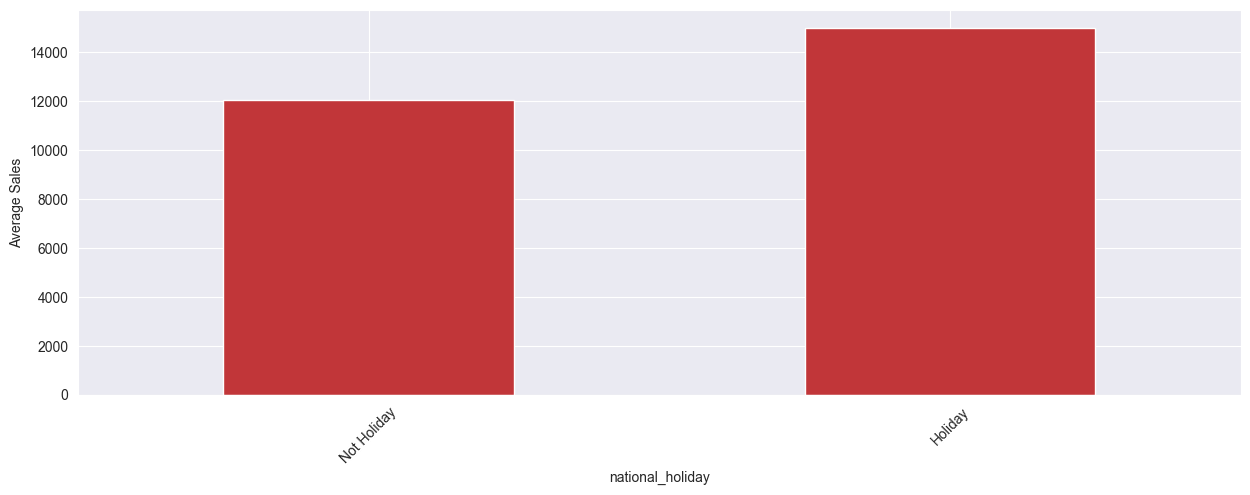

In [346]:
transaction_full.groupby("national_holiday")["sales"].mean().plot(kind="bar", figsize=(15, 5))

plt.xticks(np.arange(0, 2), ["Not Holiday", "Holiday"], rotation=45)
plt.ylabel("Average Sales")

plt.show()

key points :

1. Number of holidays in 214 is increasing because of the World Cup 2014 in Brazil. Then in 2016 because of equador earthquake.
2. Average sales in holidays is higher than not holidays
3. if we see in 2015 number of holidays is decreasing but the average sales is increasing. Maybe because of the number of promotion is increasing 136%

#### Analysis by Month

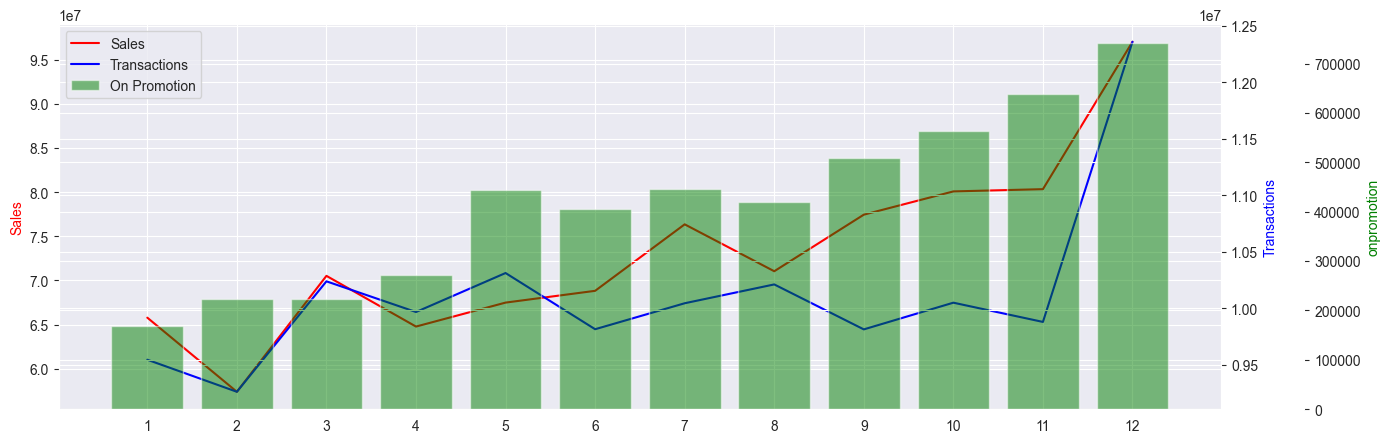

In [347]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("month")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("month")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.bar(transaction_full.groupby("month")["onpromotion"].sum().index, transaction_full.groupby("month")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(1,13, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("month")

plt.show()


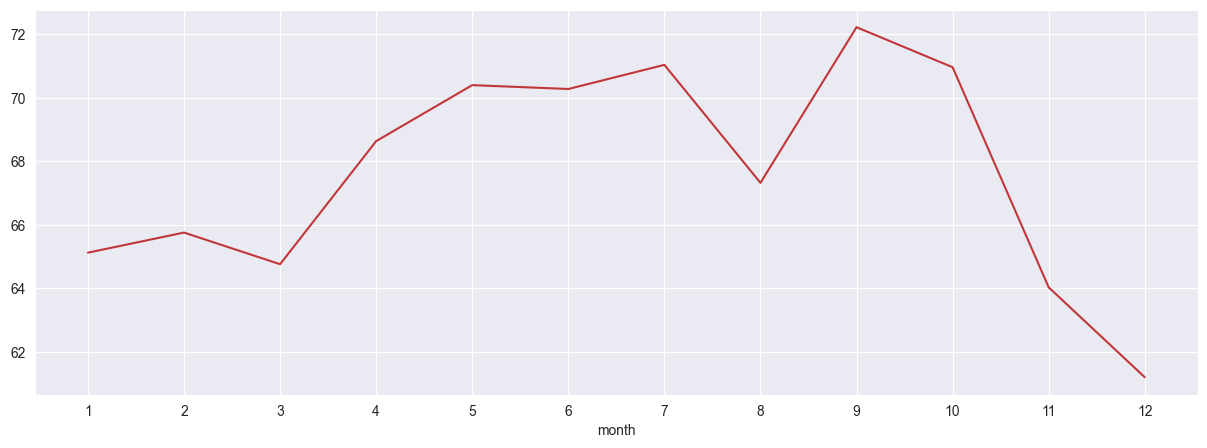

In [348]:
oil.groupby("month")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 13))

plt.show()

In [349]:
month = transaction_full.groupby(["year", "month"])["sales"].sum().reset_index()

<AxesSubplot: xlabel='month', ylabel='sales'>

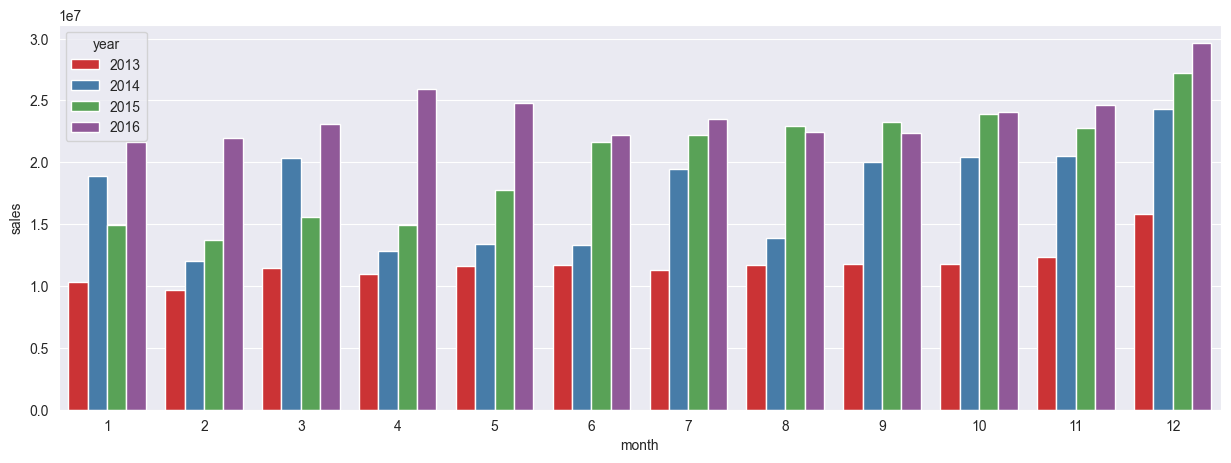

In [350]:
plt.figure(figsize=(15, 5))

sns.barplot(x="month", y="sales", hue="year", data=month, palette="Set1", legend=True)

In [351]:
month_promo = transaction_full.groupby(["month", "year"])["onpromotion"].sum().reset_index()


<AxesSubplot: xlabel='month', ylabel='onpromotion'>

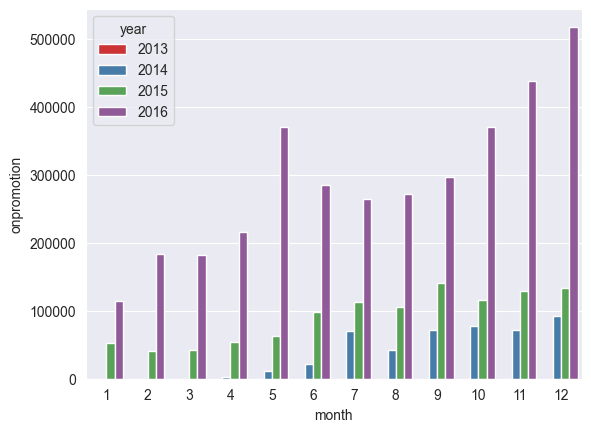

In [352]:
sns.barplot(x="month", y="onpromotion", hue="year", data=month_promo, palette="Set1", legend=True)

key points: 

1. The sales activity is increasing juny and july 2016. This is the time when earthquake happened in Ecuador (16 April 2016) and those days were holidays around one month. Number of promotion also increased in that month

2. The point is also in july 2014 the sales and oromotion slightly increased. This is the time when world cup 2014 happened in Brazil. Ecuador is one of the country that participated in the world cup. 

In [353]:
month_holidays = holidays_filtered.groupby(["year", "month"])["national_holiday"].sum().reset_index()

In [354]:
transaction_full["agg_national_holiday"] = transaction_full.groupby(["year", "month", "day"])["national_holiday"].transform("sum")

In [355]:
correlation_data = transaction_full[["sales", "transactions", "onpromotion", "dcoilwtico", "year", "month", "day"]].merge(month_holidays, left_on=["year", "month"], right_on=["year", "month"], how="left")


In [356]:
correlation_data[["sales", "transactions", "onpromotion", "dcoilwtico", "national_holiday"]].corr()

,sales,transactions,onpromotion,dcoilwtico,national_holiday
sales,1.000000,0.835647,0.289081,-0.262766,0.109916
transactions,0.835647,1.000000,0.088241,0.018856,0.036697
onpromotion,0.289081,0.088241,1.000000,-0.512223,0.226653
dcoilwtico,-0.262766,0.018856,-0.512223,1.000000,-0.136170
national_holiday,0.109916,0.036697,0.226653,-0.136170,1.000000


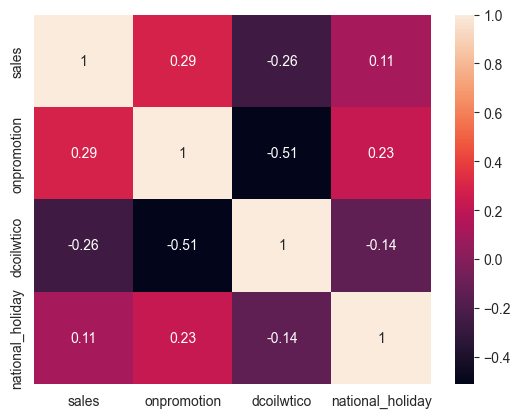

In [357]:
#### Corerlation Sales and On Promotion

sns.heatmap(correlation_data[["sales", "onpromotion", "dcoilwtico", "national_holiday"]].corr(), annot=True)


plt.show()


key points :

1. If we see Sales and promotion as correlation and we can see from pearson correlation, it means that promotion is the key to increase sales

2. Then oil price has high correlation with promotion, it mean it hopes with oil price decrease can increase customer to buy more product then with promotion can increase more sales

3. we can see aslo promotion has correaltion with holiday. it hopes in holidays customer can buy more product with additional promotion. However it is not as efective as oil price


### Do Analysis by day

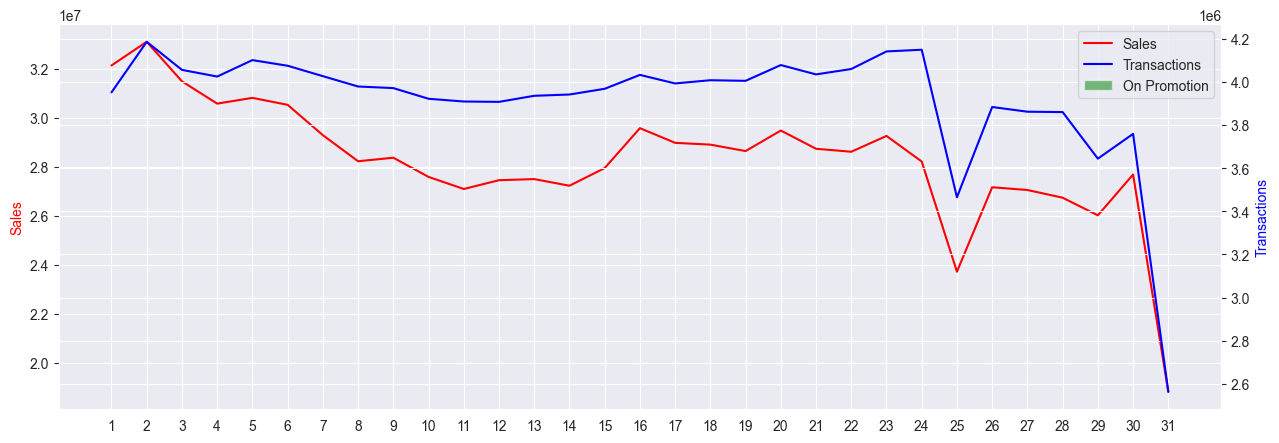

In [358]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("day")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("day")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

plt.xticks(np.arange(1,32, 1))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("day")

plt.show()


we have low value in day 25 because we have missing days for 25 december

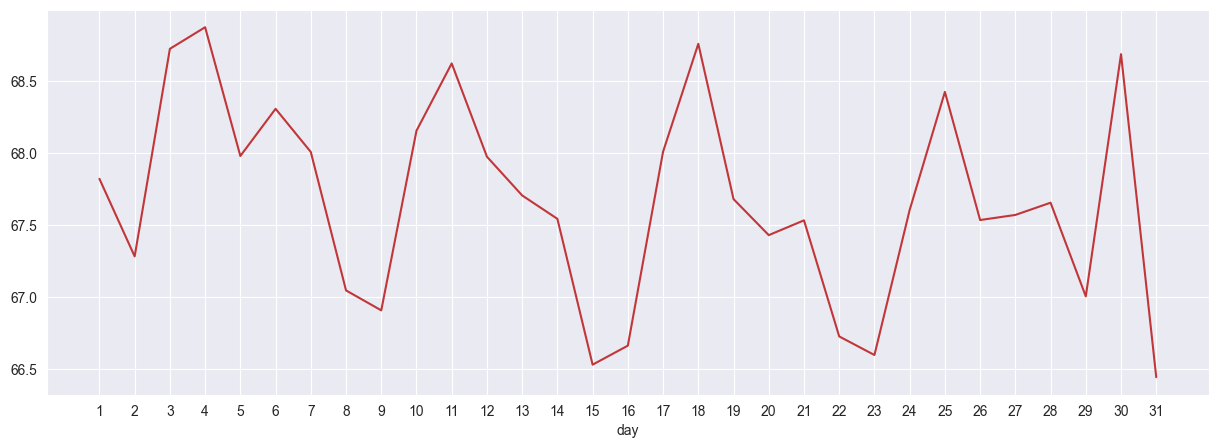

In [360]:
oil.groupby("day")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))

plt.show()

In [364]:
train_viz.query("day == 26").tail()

,id,store_nbr,family,sales,onpromotion,year,month,weekday,day,quarter
date,,,,,,,,,,
2016-12-26,2587459,9,POULTRY,704.269960,0,2016,12,Monday,26,4
2016-12-26,2587460,9,PREPARED FOODS,105.548996,2,2016,12,Monday,26,4
2016-12-26,2587461,9,PRODUCE,2030.049000,3,2016,12,Monday,26,4
2016-12-26,2587462,9,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2016,12,Monday,26,4
2016-12-26,2587463,9,SEAFOOD,12.000000,0,2016,12,Monday,26,4


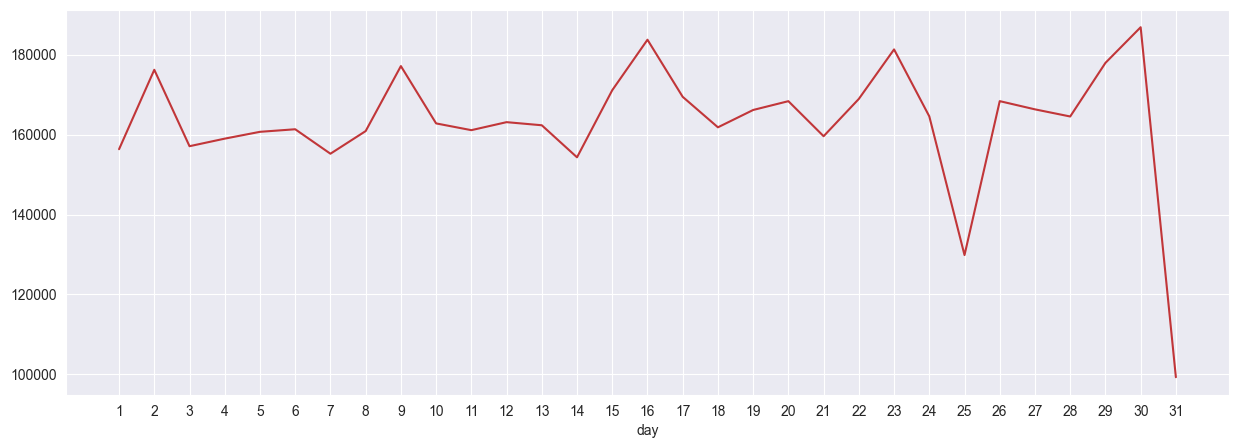

In [397]:
transaction_full.groupby("day")["onpromotion"].sum().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(1, 32))

plt.show()

key points:

As we can see sales and transactions are start to slightly increase when start the month and deacrease the slighly increase again when enter the middle of month because some wages are paid in the middle of month and end of month

### Do analysis by weekday

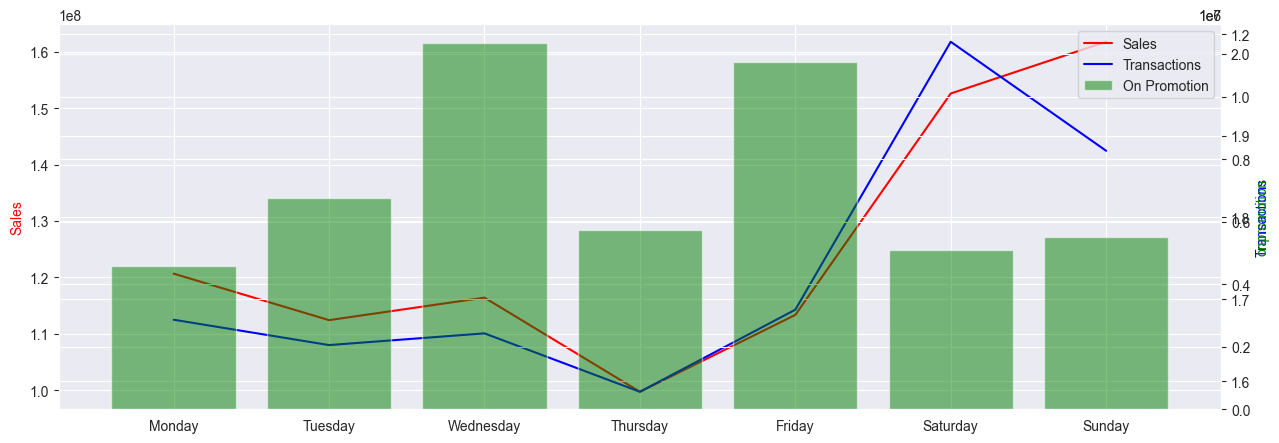

In [388]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(transaction_full.groupby("weekday")["sales"].sum(), color="red", label="Sales")
ax2.plot(transaction_full.groupby("weekday")["transactions"].sum(), color="blue", label="Transactions")

ax1.set_ylabel('Sales', color="red")
ax2.set_ylabel('Transactions', color="blue")

ax3 = ax1.twinx()
ax3.bar(transaction_full.groupby("weekday")["onpromotion"].sum().index, transaction_full.groupby("weekday")["onpromotion"].sum(), color="green", alpha=0.5, label="On Promotion")
ax3.set_ylabel('onpromotion', color="green")

plt.xticks(np.arange(0,7, 1), weekday_order)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
plt.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.xlabel("weekday")

plt.show()


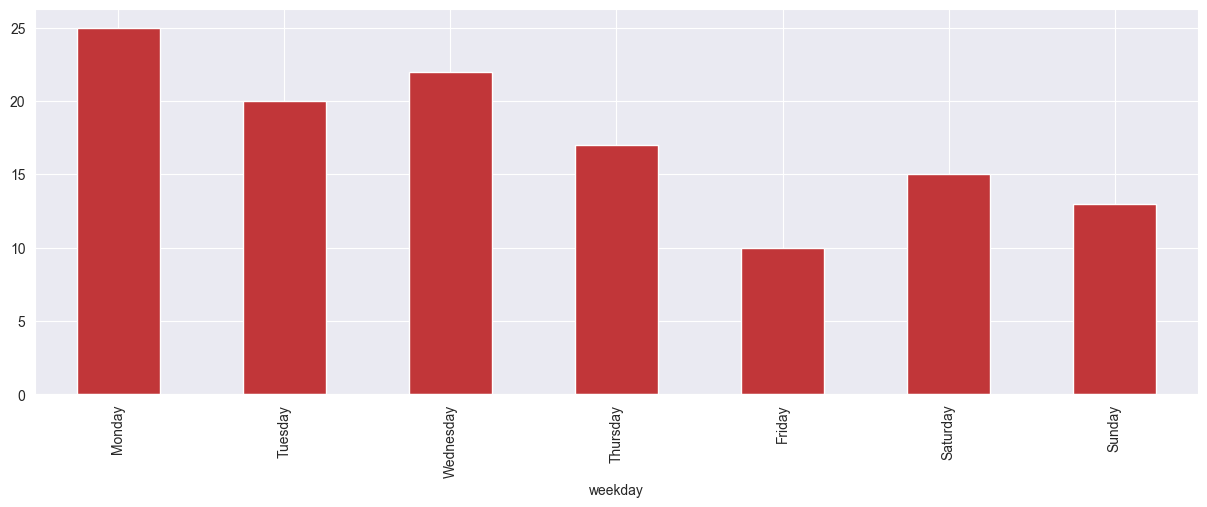

In [399]:
holidays_filtered.groupby("weekday")["national_holiday"].sum().plot(kind="bar", figsize=(15, 5))

plt.xticks(np.arange(0,7, 1), weekday_order)

plt.show()

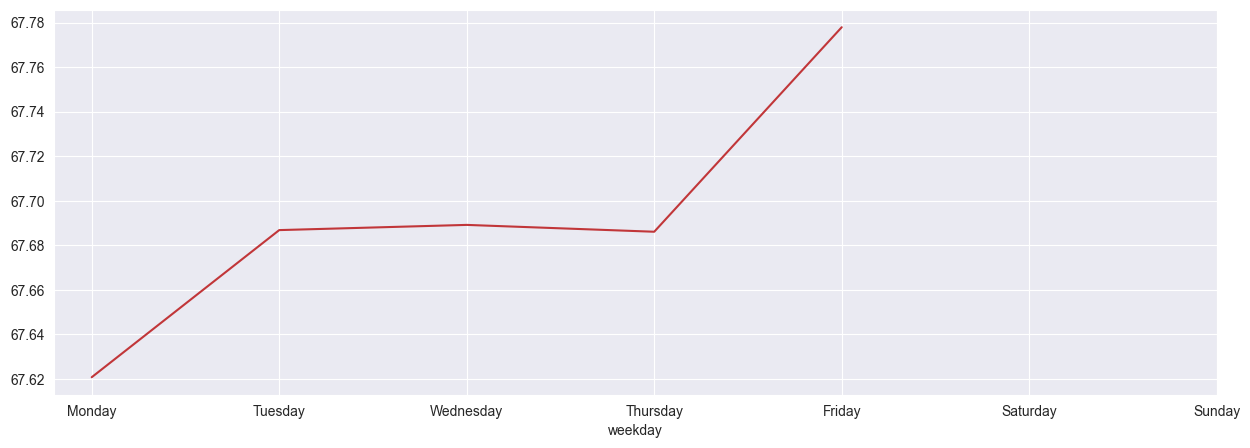

In [391]:
oil.groupby("weekday")["dcoilwtico"].mean().plot(kind="line", figsize=(15, 5))

plt.xticks(np.arange(0, 7,1), weekday_order)

plt.show()

key points :

1. we dont have information about trade oil on weekend because the oil market is closed on weekend.
so that is why we have missing days on weekend for oil data. So It means we can fill the data for the weekend based on previous value

2. we can see for weekdays is rely on the promotion but number of transaction and sales is increase when enter weekend

### Do Analysis by Store

In [401]:
transaction_full.head()

,store_nbr,transactions,year,month,day,weekday,city,state,type,cluster,sales,onpromotion,aov,psr,local_holiday,regional_holiday,national_holiday,total_holiday,dcoilwtico,agg_national_holiday
date,,,,,,,,,,,,,,,,,,,,
2013-01-01,25,770,2013,1,1,1,Salinas,Santa Elena,D,1,2511.618999,0,3.261843,0.0,0,0,True,1,93.14,1
2013-01-02,1,2111,2013,1,2,2,Quito,Pichincha,D,13,7417.148000,0,3.513571,0.0,0,0,False,0,93.14,0
2013-01-02,2,2358,2013,1,2,2,Quito,Pichincha,D,13,10266.718981,0,4.353994,0.0,0,0,False,0,93.14,0
2013-01-02,3,3487,2013,1,2,2,Quito,Pichincha,D,8,24060.348000,0,6.900014,0.0,0,0,False,0,93.14,0
2013-01-02,4,1922,2013,1,2,2,Quito,Pichincha,D,9,10200.083980,0,5.307016,0.0,0,0,False,0,93.14,0


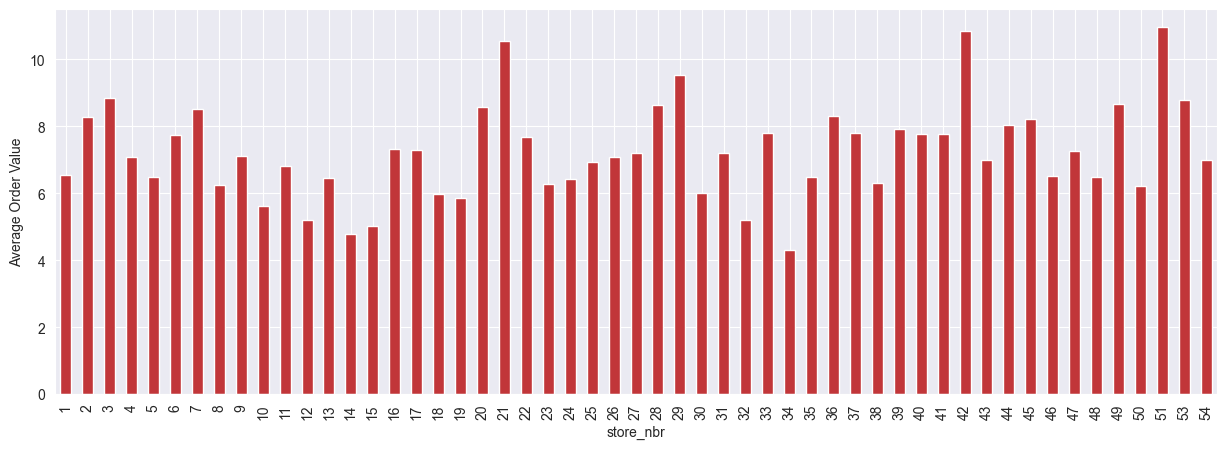

In [463]:
transaction_full.groupby("store_nbr")["aov"].mean().plot(kind="bar", figsize=(15, 5))

plt.ylabel("Average Order Value")

plt.show()


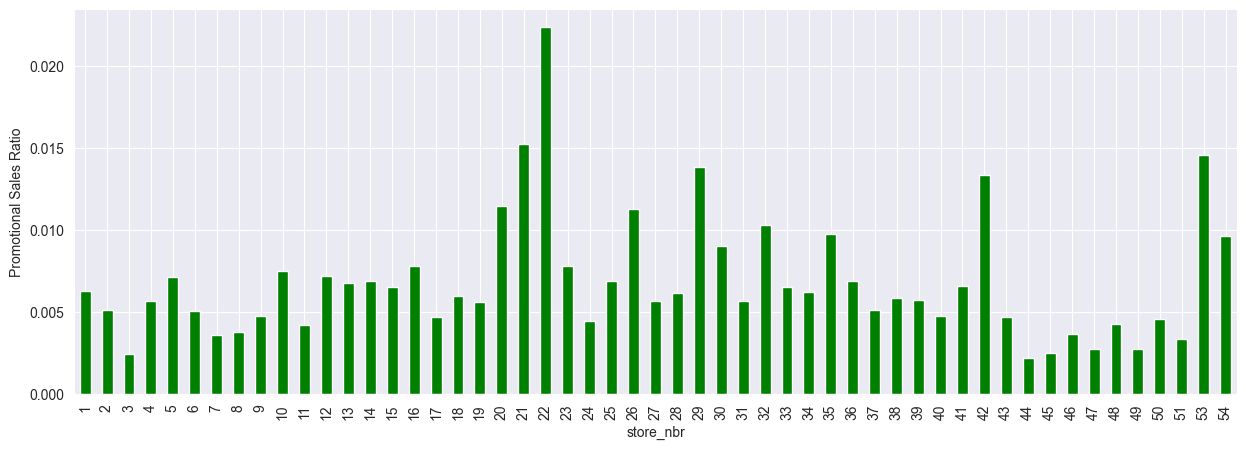

In [465]:
transaction_full.groupby("store_nbr")["psr"].mean().plot(kind="bar",color = "green", figsize=(15, 5))

plt.ylabel("Promotional Sales Ratio")
plt.show()

In [420]:
store_51 = train_viz[train_viz["store_nbr"] == 51]

In [438]:
store_51.groupby("family")["sales"].sum().sort_values(ascending=False).head()

family
GROCERY I    7.064510e+06
BEVERAGES    5.757994e+06
PRODUCE      4.377145e+06
CLEANING     2.105991e+06
DAIRY        2.085641e+06
Name: sales, dtype: float64

In [450]:
store_51.groupby("family")["onpromotion"].sum().sort_values(ascending=False).head()

family
GROCERY I    26957
PRODUCE      20968
BEVERAGES    14588
DELI          7834
CLEANING      7812
Name: onpromotion, dtype: int64

In [426]:
store_22 = train_viz[train_viz["store_nbr"] == 22]

In [429]:
store_22.groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    1.001842e+06
BEVERAGES    5.193260e+05
CLEANING     2.645490e+05
PRODUCE      1.642989e+05
DAIRY        1.265150e+05
Name: sales, dtype: float64

In [449]:
store_22.groupby("family")["onpromotion"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    15620
DAIRY         6965
BEVERAGES     5772
PRODUCE       5422
CLEANING      4835
Name: onpromotion, dtype: int64

In [ ]:
store_22 = train_viz[train_viz["store_nbr"] == 22]

<AxesSubplot: xlabel='type'>

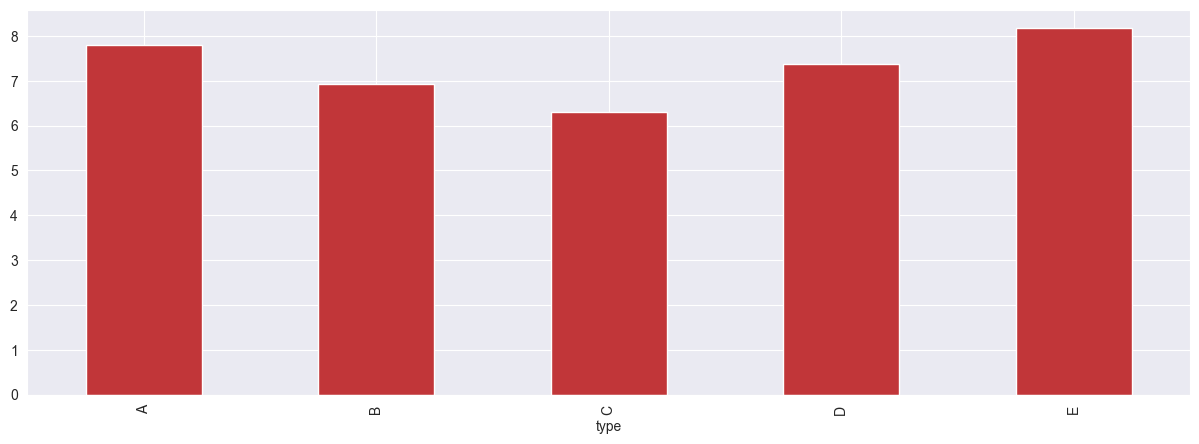

In [487]:
transaction_full.groupby("type")["aov"].mean().plot(kind="bar", figsize=(15, 5))

<AxesSubplot: xlabel='type'>

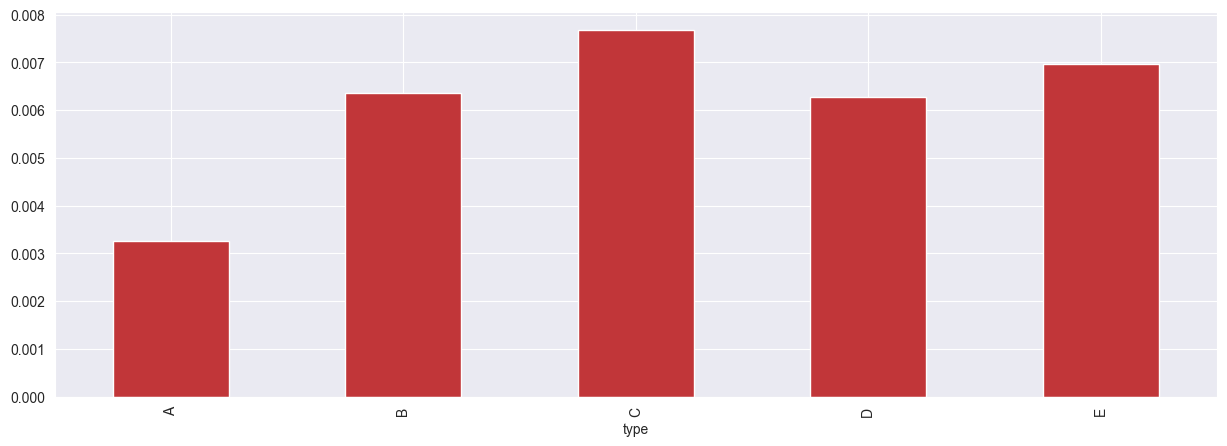

In [488]:
transaction_full.groupby("type")["psr"].mean().plot(kind="bar", figsize=(15, 5))

In [493]:
a = transaction_full.query("type == 'A'")["store_nbr"].unique()
a

array([44, 45, 46, 47, 48, 49, 50, 51])

In [494]:
c = transaction_full.query("type == 'C'")["store_nbr"].unique()
c

array([10, 12, 13, 14, 15, 16, 17, 19, 30, 32, 33, 35, 40, 54, 22])

In [491]:
train_viz.query("store_nbr in @a").groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    8.795437e+07
BEVERAGES    5.735129e+07
PRODUCE      3.531288e+07
CLEANING     2.368491e+07
DAIRY        1.913834e+07
Name: sales, dtype: float64

In [492]:
train_viz.query("store_nbr in @c").groupby("family")["sales"].sum().sort_values(ascending=False).head(5)

family
GROCERY I    5.400560e+07
BEVERAGES    2.579179e+07
CLEANING     1.763282e+07
PRODUCE      6.481227e+06
DAIRY        5.857098e+06
Name: sales, dtype: float64

In [498]:
train_viz["psr"] = train_viz["onpromotion"] / train_viz["sales"]

key points :

in store analysis, we use two parameters to measure the performance of the store, which are average order value and promotional sales ratio.

average order value is the average of sales per transaction. the higher the average order value, the better the performance of the store.
promotion sales ratio is the ratio of sales that come from promotion. the higher the promotion sales ratio means there are some sales that come from promotion. the smaller psr means that can be small number of sales on promotion is small but total sales still high. So the store is effective even without promotion.


1. 
The interesting stores come from store that have high aov but small psr wich comes from some stores in 44-51 (store with "type" A) especially for the store **51**.
vice versa, the store that have low aov but high psr comes from some stores especially **22**

it means store 51 is effective even with small promotion and store 22 is not effective with promotion

2. 
There is also probably sales is higher because the family has different unit size. for example, the family with the highest sales is beverages. it is probably because the unit size of beverages, produce is bigger than other family. so the sales is higher. You can notice from agregation above about sales data by family especially like produce.


** check by the city **

based on the type we can see if the stores is almost from Quito and also one additional store from Quayaquil. These city is the capital of the country and also the biggest city in the Equador or crowded city. So we can assume that the store in the crowded city in equador.

In [366]:
train_family = train.groupby(["family", "year", "month"])["sales"].sum().reset_index()

In [367]:
train_family.sort_values(by = ["family", "year", "month"], inplace = True)

In [368]:
train_family

,family,year,month,sales
0,AUTOMOTIVE,2013,1,6557.000000
1,AUTOMOTIVE,2013,2,7220.000000
2,AUTOMOTIVE,2013,3,7635.000000
3,AUTOMOTIVE,2013,4,7485.000000
4,AUTOMOTIVE,2013,5,9034.000000
...,...,...,...,...
1843,SEAFOOD,2017,4,36221.881986
1844,SEAFOOD,2017,5,39666.393999
1845,SEAFOOD,2017,6,31365.775991
1846,SEAFOOD,2017,7,35040.687006


In [370]:
train_family

,family,year,month,sales
0,AUTOMOTIVE,2013,1,6557.000000
1,AUTOMOTIVE,2013,2,7220.000000
2,AUTOMOTIVE,2013,3,7635.000000
3,AUTOMOTIVE,2013,4,7485.000000
4,AUTOMOTIVE,2013,5,9034.000000
...,...,...,...,...
1843,SEAFOOD,2017,4,36221.881986
1844,SEAFOOD,2017,5,39666.393999
1845,SEAFOOD,2017,6,31365.775991
1846,SEAFOOD,2017,7,35040.687006


In [371]:
#this is 3 faimily with highest sales 
BestFamily = ["GROCERY I", "BEVERAGES", "PRODUCE"]

In [372]:
train_family_best = train_family[train_family["family"].isin(BestFamily)]

In [373]:
check  = test_train[test_train["family"].isin(BestFamily)]

NameError: name 'test_train' is not defined

<AxesSubplot: xlabel='month', ylabel='sales'>

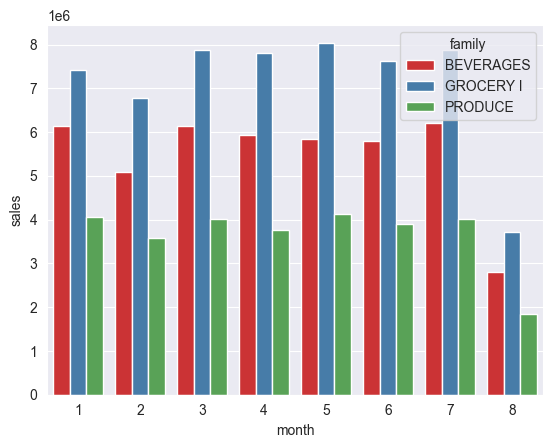

In [ ]:
viz = train_family_best[train_family_best["year"] == 2017]

sns.barplot(x="month", y="sales", hue="family", data=viz, palette="Set1", legend=True)

<AxesSubplot: xlabel='month', ylabel='sales'>

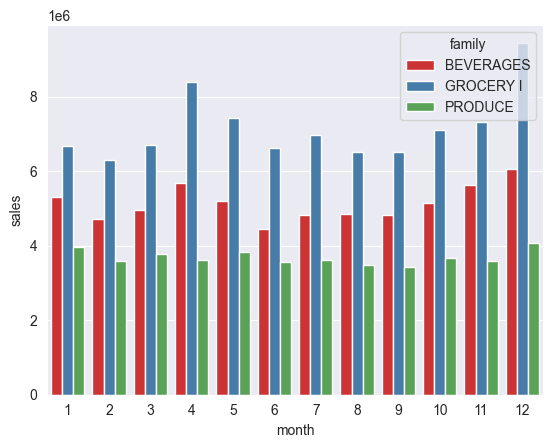

In [ ]:
viz = train_family_best[train_family_best["year"] == 2016]

sns.barplot(x="month", y="sales", hue="family", data=viz, palette="Set1", legend=True)

In [ ]:
viz["pct_change"] = viz["sales"].pct_change()*100

viz.loc[viz["month"] == 1, "pct_change"] = 0

In [ ]:
viz

,family,year,month,sales,pct_change
204,BEVERAGES,2016,1,5.307788e+06,0.000000
205,BEVERAGES,2016,2,4.730609e+06,-10.874191
206,BEVERAGES,2016,3,4.967615e+06,5.010053
207,BEVERAGES,2016,4,5.694504e+06,14.632555
208,BEVERAGES,2016,5,5.198351e+06,-8.712840
209,BEVERAGES,2016,6,4.463076e+06,-14.144389
210,BEVERAGES,2016,7,4.837784e+06,8.395734
211,BEVERAGES,2016,8,4.864024e+06,0.542397
212,BEVERAGES,2016,9,4.827054e+06,-0.760070
213,BEVERAGES,2016,10,5.161401e+06,6.926523


<AxesSubplot: xlabel='month', ylabel='sales'>

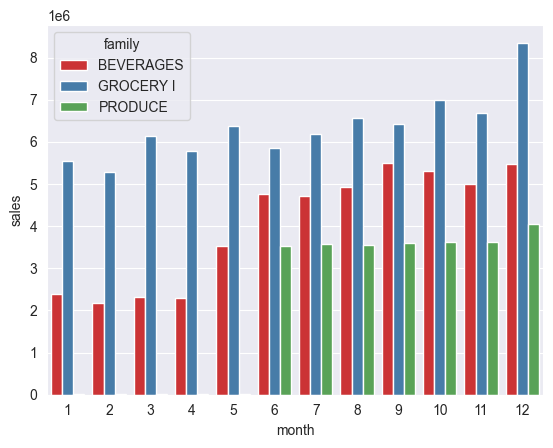

In [ ]:
viz = train_family_best[train_family_best["year"] == 2015]

sns.barplot(x="month", y="sales", hue="family", data=viz, palette="Set1", legend=True)

In [ ]:
viz["pct_change"] = viz["sales"].pct_change()*100

viz.loc[viz["month"] == 1, "pct_change"] = 0

In [ ]:
viz

,family,year,month,sales,pct_change
192,BEVERAGES,2015,1,2.397121e+06,0.000000
193,BEVERAGES,2015,2,2.169912e+06,-9.478412
194,BEVERAGES,2015,3,2.320034e+06,6.918345
195,BEVERAGES,2015,4,2.307147e+06,-0.555466
196,BEVERAGES,2015,5,3.534100e+06,53.180530
197,BEVERAGES,2015,6,4.767226e+06,34.892221
198,BEVERAGES,2015,7,4.719130e+06,-1.008889
199,BEVERAGES,2015,8,4.935188e+06,4.578344
200,BEVERAGES,2015,9,5.497255e+06,11.388968
201,BEVERAGES,2015,10,5.307322e+06,-3.455052


<AxesSubplot: xlabel='month', ylabel='sales'>

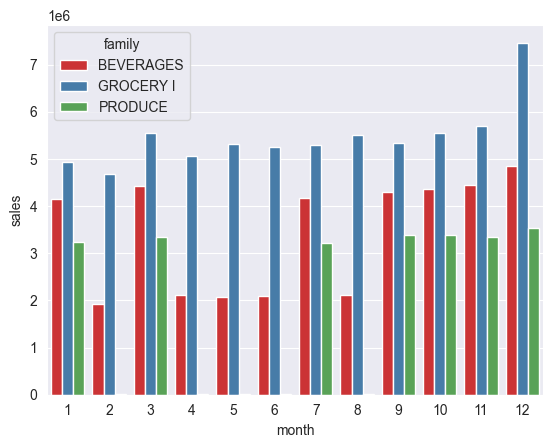

In [ ]:
viz = train_family_best[train_family_best["year"] == 2014]

sns.barplot(x="month", y="sales", hue="family", data=viz, palette="Set1", legend=True)

In [ ]:
viz["pct_change"] = viz["sales"].pct_change()*100

viz.loc[viz["month"] == 1, "pct_change"] = 0

In [ ]:
viz

,family,year,month,sales,pct_change
180,BEVERAGES,2014,1,4.145798e+06,0.000000
181,BEVERAGES,2014,2,1.916753e+06,-53.766368
182,BEVERAGES,2014,3,4.430194e+06,131.130146
183,BEVERAGES,2014,4,2.113125e+06,-52.301750
184,BEVERAGES,2014,5,2.081778e+06,-1.483443
185,BEVERAGES,2014,6,2.100878e+06,0.917485
186,BEVERAGES,2014,7,4.175817e+06,98.765326
187,BEVERAGES,2014,8,2.109229e+06,-49.489429
188,BEVERAGES,2014,9,4.304900e+06,104.098275
189,BEVERAGES,2014,10,4.370286e+06,1.518874


In [ ]:
check = train_family_best.groupby(["family", "year"])["sales"].sum().reset_index()

In [ ]:
check.sort_values(by=["family", "year"], inplace=True)

In [ ]:
check

,family,year,sales
0,BEVERAGES,2013,1.814823e+06
1,BEVERAGES,2014,3.420869e+06
2,BEVERAGES,2015,4.035491e+06
3,BEVERAGES,2016,5.145641e+06
4,BEVERAGES,2017,5.494074e+06
5,GROCERY I,2013,4.861661e+06
6,GROCERY I,2014,5.472233e+06
7,GROCERY I,2015,6.352378e+06
8,GROCERY I,2016,7.173878e+06
9,GROCERY I,2017,7.142617e+06


In [ ]:
check["pct_change"] = check["sales"].pct_change()*100 

In [ ]:
check.loc[check["year"] == 2013, "pct_change"] = 0

In [ ]:
check

,family,year,sales,pct_change
0,BEVERAGES,2013,1.814823e+06,0.000000
1,BEVERAGES,2014,3.420869e+06,88.495997
2,BEVERAGES,2015,4.035491e+06,17.966834
3,BEVERAGES,2016,5.145641e+06,27.509645
4,BEVERAGES,2017,5.494074e+06,6.771429
5,GROCERY I,2013,4.861661e+06,0.000000
6,GROCERY I,2014,5.472233e+06,12.558914
7,GROCERY I,2015,6.352378e+06,16.083850
8,GROCERY I,2016,7.173878e+06,12.932164
9,GROCERY I,2017,7.142617e+06,-0.435763
